In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import librosa
import os

# About Dataset

In [27]:
train_data = pd.read_csv("dataset/long_length_data/train_metadata.csv")
test_data = pd.read_csv("dataset/long_length_data/test_metadata.csv")
train_data_chunks = pd.read_csv("dataset/long_length_data/train_metadata_chunks.csv")
test_data_chunks = pd.read_csv("dataset/long_length_data/test_metadata_chunks.csv")

In [28]:
train_data["duration"] = [librosa.get_duration(filename=os.path.join("dataset/long_length_data", i)) for i in train_data["name"]]
test_data["duration"] = [librosa.get_duration(filename=os.path.join("dataset/long_length_data", i)) for i in test_data["name"]]

/tmp/ipykernel_136796/363301278.py:1: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  train_data["duration"] = [librosa.get_duration(filename=os.path.join("dataset/long_length_data", i)) for i in train_data["name"]]
/tmp/ipykernel_136796/363301278.py:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  test_data["duration"] = [librosa.get_duration(filename=os.path.join("dataset/long_length_data", i)) for i in test_data["name"]]


In [29]:
train_data.head()

,name,encode_label,decode_rhythm,gen_rhythm,split,duration
0,sound0.wav,"[387, 53, 267, 181, 387, 71, 305, 199, 387, 55...","['16th', 'quarter', '16th', '8th', '16th', 'wh...","['16th', 'quarter', '16th', '8th', '16th', 'wh...",train,8.196644
1,sound2.wav,"[387, 67, 355, 195, 387, 69, 267, 197, 387, 72...","['half', '16th', 'half', 'quarter', 'half', '1...","['half', '16th', 'half', 'quarter', 'half', '1...",train,16.207528
2,sound3.wav,"[387, 69, 355, 355, 197, 387, 52, 267, 180, 38...","['whole', '16th', 'half', 'half', 'half', 'hal...","['whole', '16th', 'half', 'half', 'half', 'hal...",train,17.774875
3,sound4.wav,"[387, 72, 280, 200, 387, 60, 280, 188, 387, 60...","['8th', '8th', 'whole', 'half', 'whole', '8th'...","['8th', '8th', 'whole', 'half', 'whole', '8th'...",train,12.956735
4,sound5.wav,"[387, 74, 355, 355, 202, 387, 69, 355, 197, 38...","['whole', 'half', 'quarter', 'half', 'half', '...","['whole', 'half', 'quarter', 'half', 'half', '...",train,17.519456


In [30]:
print("train data")
train_data.info()
print("_"*50)
print("test data")
test_data.info()

train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1392 non-null   object 
 1   encode_label   1392 non-null   object 
 2   decode_rhythm  1392 non-null   object 
 3   gen_rhythm     1392 non-null   object 
 4   split          1392 non-null   object 
 5   duration       1392 non-null   float64
dtypes: float64(1), object(5)
memory usage: 65.4+ KB
__________________________________________________
test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           608 non-null    object 
 1   encode_label   608 non-null    object 
 2   decode_rhythm  608 non-null    object 
 3   gen_rhythm     608 non-null    object 
 4   split          608 non-null    object 
 5   

In [31]:
print("Length of midi-like Label")
pd.concat([train_data["encode_label"].apply(lambda x: len(ast.literal_eval(x))).agg(['count', 'min', 'max', 'mean']), 
           test_data["encode_label"].apply(lambda x: len(ast.literal_eval(x))).agg(['count', 'min', 'max', 'mean'])], 
           axis=1).set_axis(["train_data", "test_data"], axis=1)

Length of midi-like Label


,train_data,test_data
count,1392.000000,608.000000
min,32.000000,32.000000
max,80.000000,81.000000
mean,54.030891,52.287829


In [32]:
print("Unique Length of Rhythm label") # generate with logic --> random length 8, 12, 16 and random +1, +2
len_of_label = pd.concat([train_data["decode_rhythm"].apply(lambda x: len(ast.literal_eval(x))).value_counts().sort_index(),
           test_data["decode_rhythm"].apply(lambda x: len(ast.literal_eval(x))).value_counts().sort_index()],
           axis=1).set_axis(["train_data", "test_data"], axis=1)
len_of_label

Unique Length of Rhythm label


,train_data,test_data
decode_rhythm,,
8,215,110
9,118,65
10,121,56
12,224,93
13,118,53
14,104,46
16,248,89
17,124,56
18,120,40


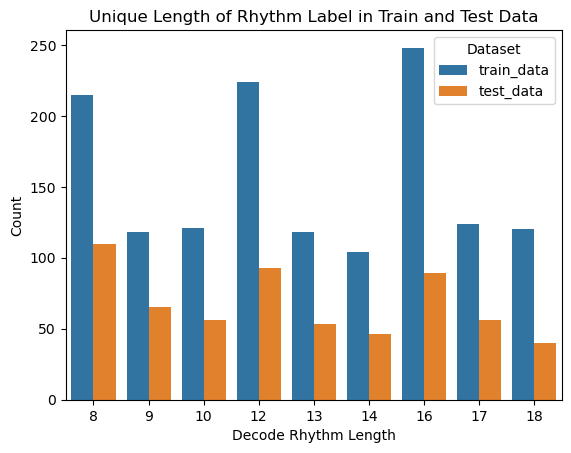

In [33]:
df_len_of_label = len_of_label.reset_index().melt(id_vars="decode_rhythm", var_name="Dataset", value_name="Count")
sns.barplot(x="decode_rhythm", y="Count", hue="Dataset", data=df_len_of_label)
plt.xlabel("Decode Rhythm Length")
plt.ylabel("Count")
plt.title("Unique Length of Rhythm Label in Train and Test Data")
plt.show()

In [34]:
print("unique of rhythm label")
uni_rhythm = pd.concat([pd.DataFrame([item for sublist in train_data["decode_rhythm"].apply(lambda x: ast.literal_eval(x)).to_list() for item in sublist]).value_counts().sort_index(),
           pd.DataFrame([item for sublist in test_data["decode_rhythm"].apply(lambda x: ast.literal_eval(x)).to_list() for item in sublist]).value_counts().sort_index()],
           axis=1).set_axis(["train_data", "test_data"], axis=1)
uni_rhythm


unique of rhythm label


,train_data,test_data
0,,
16th,3612,1532
8th,3618,1480
half,3610,1553
quarter,3578,1538
whole,3488,1467


In [35]:
train_data.loc[train_data["decode_rhythm"].apply(lambda x: len(ast.literal_eval(x))) == 16]

,name,encode_label,decode_rhythm,gen_rhythm,split,duration
6,sound9.wav,"[387, 79, 305, 207, 387, 53, 280, 181, 387, 74...","['quarter', '8th', '16th', 'whole', '8th', '16...","['quarter', '8th', '16th', 'whole', '8th', '16...",train,12.387846
10,sound15.wav,"[387, 60, 355, 188, 387, 55, 280, 183, 387, 48...","['half', '8th', 'whole', 'whole', 'whole', '8t...","['half', '8th', 'whole', 'whole', 'whole', '8t...",train,18.099955
13,sound19.wav,"[387, 53, 267, 181, 387, 74, 355, 355, 202, 38...","['16th', 'whole', 'quarter', '8th', '8th', 'ha...","['16th', 'whole', 'quarter', '8th', '8th', 'ha...",train,13.966803
22,sound29.wav,"[387, 79, 280, 207, 387, 67, 305, 195, 387, 79...","['8th', 'quarter', '8th', 'half', 'quarter', '...","['8th', 'quarter', '8th', 'half', 'quarter', '...",train,14.024853
25,sound33.wav,"[387, 52, 305, 180, 387, 47, 355, 175, 387, 52...","['quarter', 'half', 'half', '8th', 'half', 'wh...","['quarter', 'half', 'half', '8th', 'half', 'wh...",train,12.921905
...,...,...,...,...,...,...
1376,sound1977.wav,"[387, 69, 305, 197, 387, 52, 355, 355, 180, 38...","['quarter', 'whole', 'whole', 'half', 'half', ...","['quarter', 'whole', 'whole', 'half', 'half', ...",train,24.439002
1378,sound1980.wav,"[387, 55, 355, 183, 387, 52, 355, 180, 387, 74...","['half', 'half', 'half', '16th', 'quarter', '1...","['half', 'half', 'half', '16th', 'quarter', '1...",train,15.023311
1384,sound1988.wav,"[387, 60, 280, 188, 387, 55, 355, 183, 387, 67...","['8th', 'half', 'whole', 'half', 'whole', '16t...","['8th', 'half', 'whole', 'half', 'whole', '16t...",train,16.579048
1387,sound1993.wav,"[387, 69, 280, 197, 387, 74, 267, 202, 387, 69...","['8th', '16th', 'whole', 'quarter', '16th', '1...","['8th', '16th', 'whole', 'quarter', '16th', '1...",train,14.466032


In [36]:
uni_rhythm_16 = pd.concat([pd.DataFrame([item for sublist in train_data["decode_rhythm"].apply(lambda x: ast.literal_eval(x)).to_list() for item in sublist]).value_counts().sort_index(),
           pd.DataFrame([item for sublist in test_data["decode_rhythm"].apply(lambda x: ast.literal_eval(x)).to_list() for item in sublist]).value_counts().sort_index()],
           axis=1).set_axis(["train_data", "test_data"], axis=1)
uni_rhythm_16

,train_data,test_data
0,,
16th,3612,1532
8th,3618,1480
half,3610,1553
quarter,3578,1538
whole,3488,1467


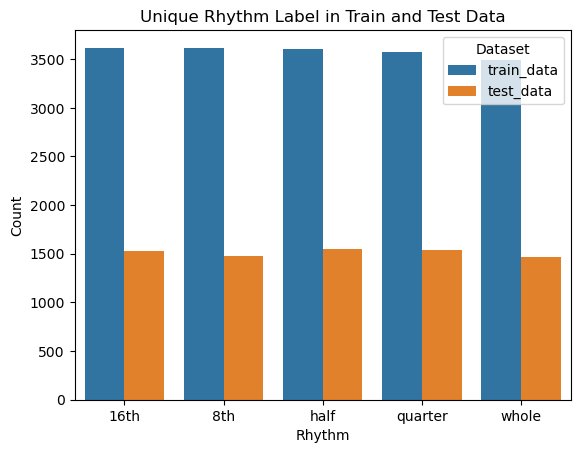

In [37]:
df_uni_rhythm = uni_rhythm.reset_index().melt(id_vars=0, var_name="Dataset", value_name="Count")
sns.barplot(x=0, y="Count", hue="Dataset", data=df_uni_rhythm)
plt.xlabel("Rhythm")
plt.ylabel("Count")
plt.title("Unique Rhythm Label in Train and Test Data")
plt.show()

In [38]:
# Filter train_data and test_data to include only rhythms with length of 16
train_rhythm_16 = train_data[train_data["decode_rhythm"].apply(lambda x: len(ast.literal_eval(x)) == 16)]
test_rhythm_16 = test_data[test_data["decode_rhythm"].apply(lambda x: len(ast.literal_eval(x)) == 16)]

# Now, if you want to plot the distribution of these rhythms with length 16:
train_len_16 = train_rhythm_16["decode_rhythm"].apply(lambda x: ast.literal_eval(x))
test_len_16 = test_rhythm_16["decode_rhythm"].apply(lambda x: ast.literal_eval(x))

# Combine the counts of rhythms of length 16 for both train and test data
len_16_counts = pd.concat([train_len_16.value_counts().sort_index(), 
                           test_len_16.value_counts().sort_index()], axis=1).set_axis(["train_data", "test_data"], axis=1)

# Plotting
df_uni_rhythm_16 = len_16_counts.reset_index().melt(id_vars=0, var_name="Dataset", value_name="Count")
sns.barplot(x=0, y="Count", hue="Dataset", data=df_uni_rhythm_16)
plt.xlabel("Rhythm")
plt.ylabel("Count")
plt.title("Unique Rhythm Labels with Length 16 in Train and Test Data")
plt.show()

TypeError: unhashable type: 'list'

In [99]:
print("train data")
print(train_data["duration"].agg(["count", "min", "max", "sum"]))
print("_"*50)
print("test data")
print(test_data["duration"].agg(["count", "min", "max", "sum"]))

train data
count     1392.000000
min          4.794921
max         25.286531
sum      18297.184943
Name: duration, dtype: float64
__________________________________________________
test data
count     608.000000
min         5.526349
max        25.402630
sum      7811.599093
Name: duration, dtype: float64


In [100]:
longdata_test = pd.read_csv("dataset/sample_audio3_30note/train_metadata.csv")
print(f"Length of Data: {len(ast.literal_eval(longdata_test.loc[0, 'decode_rhythm']))}")
print(pd.DataFrame([item for sublist in longdata_test['decode_rhythm'].apply(lambda x: ast.literal_eval(x)).to_list() for item in sublist]).value_counts().sort_index())

Length of Data: 30
0      
16th       3
8th        7
half       8
quarter    8
whole      4
Name: count, dtype: int64


# plot incorrect index

In [2]:
def sequence_accuracy(pred, target):

    RANGE_NOTE_ON = list(range(0, 128)) # 0-127
    RANGE_NOTE_OFF = list(range(128, 256))  # 128-255
    RANGE_TIME_SHIFT = list(range(256, 356))  # 256-355
    RANGE_VEL = list(range(356, 388))  # 356-387

    # print("pred:", pred)
    # print("target:", target)
    if type(pred) != list:
        pred = ast.literal_eval(pred)
    if type(target) != list:
        target = ast.literal_eval(target)

    if len(pred) == 0:
        return 0, 0

    max_length = max(len(pred), len(target))
    if len(pred) != len(target):
        pred.extend(["<PAD>"]*(max_length-len(pred)))
        target.extend(["<PAD>"]*(max_length-len(target)))

    # Exact Accuracy (EOA)
    acc_all = 0
    acc_time = 0; cnt_time = 0
    for i in range(max_length):
        if target[i] in RANGE_TIME_SHIFT:
            cnt_time += 1
            if pred[i] == target[i]:
                acc_time += 1
        if pred[i] in RANGE_TIME_SHIFT and target[i] not in RANGE_TIME_SHIFT:
            acc_time -= 1
        if pred[i] == target[i]:
            acc_all += 1

    acc_all = acc_all / max_length
    acc_time = acc_time / cnt_time

    return acc_all, acc_time

In [3]:
def rhythm_accuracy(rhythm_predict, rhythm_target):

    if type(rhythm_predict) != list:
        rhythm_predict = ast.literal_eval(rhythm_predict)
    if type(rhythm_target) != list:
        rhythm_target = ast.literal_eval(rhythm_target)

    # print(rhythm_predict, rhythm_target)

    if len(rhythm_predict) == 0:
        return 0

    max_length = max(len(rhythm_predict), len(rhythm_target))
    if len(rhythm_predict) != len(rhythm_target):
        rhythm_predict.extend(["<PAD>"]*(max_length-len(rhythm_predict)))
        rhythm_target.extend(["<PAD>"]*(max_length-len(rhythm_target)))

    acc_rhythm = 0
    for i in range(max_length):
        if rhythm_predict[i] == rhythm_target[i]:
            acc_rhythm += 1
    
    acc_rhythm = acc_rhythm / max_length
    return acc_rhythm



In [4]:
def wrong_index(pred, target):
    fig, ax = plt.subplots(1, 1, figsize=(16,10))
    wrong = {}

    for p, t in zip(pred, target):
        if type(p) != list:
            p = ast.literal_eval(p)
        if type(t) != list:
            t = ast.literal_eval(t)

        if len(p) < len(t):
            pad_num = len(t) - len(p)
            p.extend(["<PAD>"]*pad_num)

        for idx in range(len(t)):
            if idx not in wrong.keys():
                wrong[idx] = {"true":[t[idx]],
                              "pred":[p[idx]],
                              "count":0}
            else:
                wrong[idx]["true"].append(t[idx])
                wrong[idx]["pred"].append(p[idx])

            if p[idx] != t[idx]:
                wrong[idx]["count"] += 1
        

    plt.bar_label(plt.bar(wrong.keys(), [wrong[i]["count"] for i in wrong.keys()]), fontsize=16)
    plt.xticks(list(wrong.keys()), fontsize=16)
    plt.xlabel("index", fontsize=16)
    plt.ylabel("amount", fontsize=16)
    plt.title("Incorrect Index - total")
    plt.close()
    
    return fig, wrong

def plot_wrong_norm(wrong_dict):
    fig, ax = plt.subplots(1, 1, figsize=(16,10))
    plt.bar_label(plt.bar(wrong_dict.keys(), [round(wrong_dict[i]["count"] / len(wrong_dict[i]["true"]),2) for i in wrong_dict.keys()]), fontsize=16)
    plt.xticks(list(wrong_dict.keys()), fontsize=16)
    plt.xlabel("index", fontsize=16)
    plt.ylabel("amount", fontsize=16)
    plt.title("Incorrect Index - norm")
    plt.close()

    return fig

# Test data compare

In [3]:
unchunk_0 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_020241001-2304/long_length_data_test.csv")
unchunk_1 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_120241001-1916/long_length_data_test.csv")
unchunk_2 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_220241001-2305/long_length_data_test.csv")

chunk_0 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_020241026-0153/long_length_data_test.csv")
chunk_1 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_120241026-0155/long_length_data_test.csv")
chunk_2 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_220241026-0155/long_length_data_test.csv")

In [105]:
list_of_file = [unchunk_0, chunk_0, unchunk_1, chunk_1, unchunk_2, chunk_2]

In [4]:
test_data

,name,encode_label,decode_rhythm,gen_rhythm,split
0,sound1.wav,"[387, 69, 267, 197, 387, 60, 280, 188, 387, 69...","['16th', '8th', 'half', '16th', '16th', '8th',...","['16th', '8th', 'half', '16th', '16th', '8th',...",test
1,sound6.wav,"[387, 72, 355, 200, 387, 74, 267, 202, 387, 69...","['half', '16th', '8th', 'whole', 'quarter', 'q...","['half', '16th', '8th', 'whole', 'quarter', 'q...",test
2,sound8.wav,"[387, 71, 280, 199, 387, 71, 280, 199, 387, 55...","['8th', '8th', '8th', 'whole', '16th', 'half',...","['8th', '8th', '8th', 'whole', '16th', 'half',...",test
3,sound10.wav,"[387, 79, 355, 355, 207, 387, 71, 355, 355, 19...","['whole', 'whole', '8th', 'whole', '8th', 'who...","['whole', 'whole', '8th', 'whole', '8th', 'who...",test
4,sound11.wav,"[387, 77, 267, 205, 387, 48, 355, 176, 387, 69...","['16th', 'half', 'half', 'quarter', 'quarter',...","['16th', 'half', 'half', 'quarter', 'quarter',...",test
...,...,...,...,...,...
603,sound1985.wav,"[387, 74, 355, 355, 202, 387, 47, 355, 175, 38...","['whole', 'half', '8th', 'whole', 'quarter', '...","['whole', 'half', '8th', 'whole', 'quarter', '...",test
604,sound1989.wav,"[387, 47, 267, 175, 387, 71, 305, 199, 387, 55...","['16th', 'quarter', 'half', '8th', 'half', '16...","['16th', 'quarter', 'half', '8th', 'half', '16...",test
605,sound1990.wav,"[387, 72, 280, 200, 387, 67, 267, 195, 387, 60...","['8th', '16th', '16th', 'half', 'whole', 'quar...","['8th', '16th', '16th', 'half', 'whole', 'quar...",test
606,sound1995.wav,"[387, 77, 355, 355, 205, 387, 79, 305, 207, 38...","['whole', 'quarter', 'quarter', 'quarter', 'ha...","['whole', 'quarter', 'quarter', 'quarter', 'ha...",test


In [5]:
def find_acc(filename, test_file):
    total_acc_all = []; total_acc_time = []; total_acc_rhythm = []
    for i in range(len(filename)):
        acc_all, acc_time = sequence_accuracy(filename.loc[i, "encode_predict"], test_file.loc[i, "encode_label"])
        acc_rhythm = rhythm_accuracy(filename.loc[i, "decode_predict"], test_file.loc[i, "decode_rhythm"])
        total_acc_all.append(acc_all); total_acc_time.append(acc_time); total_acc_rhythm.append(acc_rhythm)
    return f"{np.average(total_acc_all):.4%}", f"{np.average(total_acc_time):.4%}", f"{np.average(total_acc_rhythm):.4%}"

In [10]:
print(find_acc(unchunk_0, test_data))
print(find_acc(unchunk_1, test_data))
print(find_acc(unchunk_2, test_data))
print(find_acc(chunk_0, test_data_chunks))
print(find_acc(chunk_1, test_data_chunks))
print(find_acc(chunk_2, test_data_chunks))

('77.9048%', '66.3388%', '73.5101%')
('81.1962%', '72.3471%', '77.7211%')
('80.8167%', '71.9905%', '76.9776%')
('76.9326%', '43.4132%', '46.1216%')
('76.5121%', '50.0233%', '45.9946%')
('77.4027%', '41.7518%', '46.7633%')


In [10]:
def find_wrong_idx(filename, test_file):
    wrong_index_ls, wrong_dict = wrong_index(filename["decode_predict"], test_file["decode_rhythm"])
    wrong_index_ls = plot_wrong_norm(wrong_dict)
    return wrong_index_ls

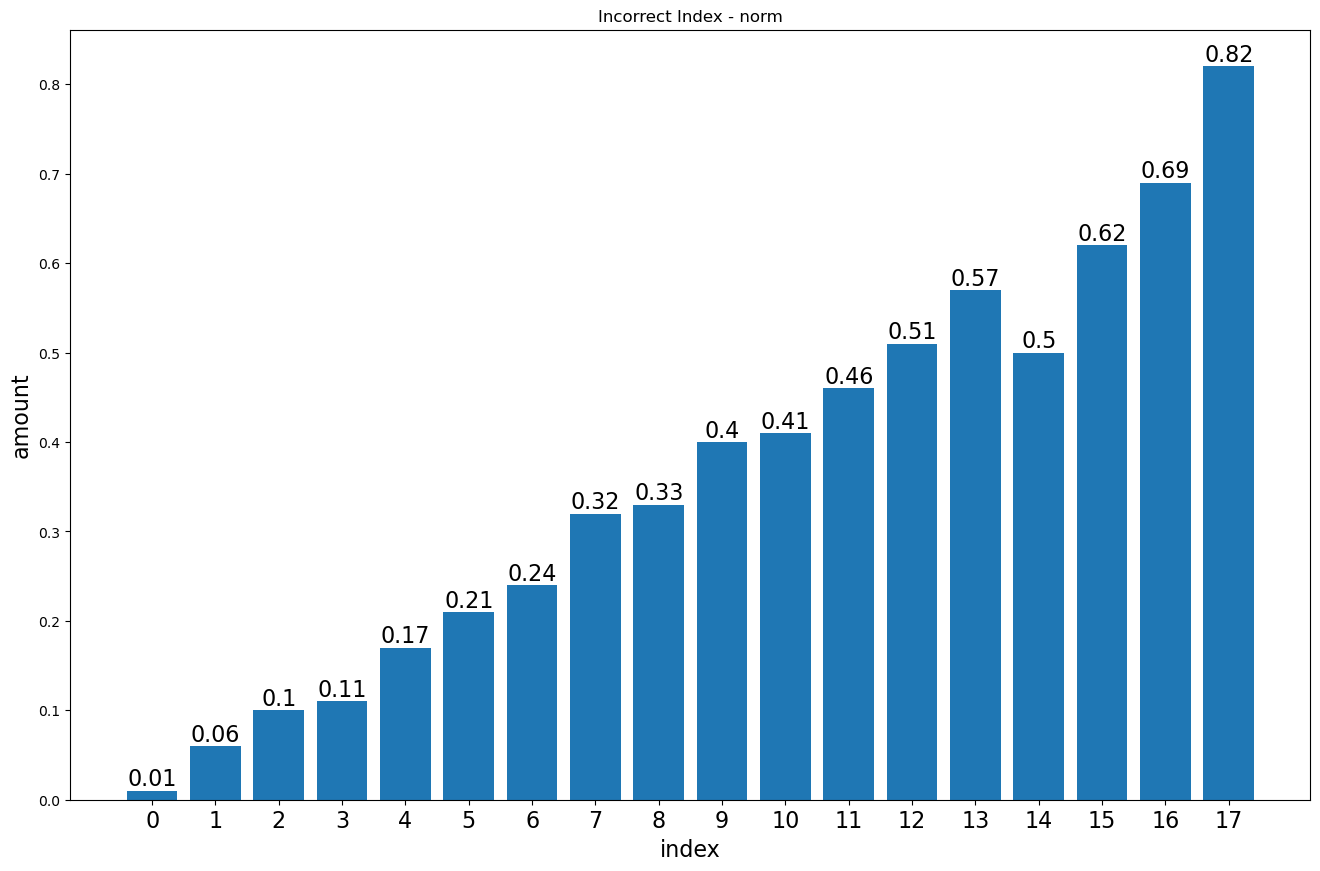

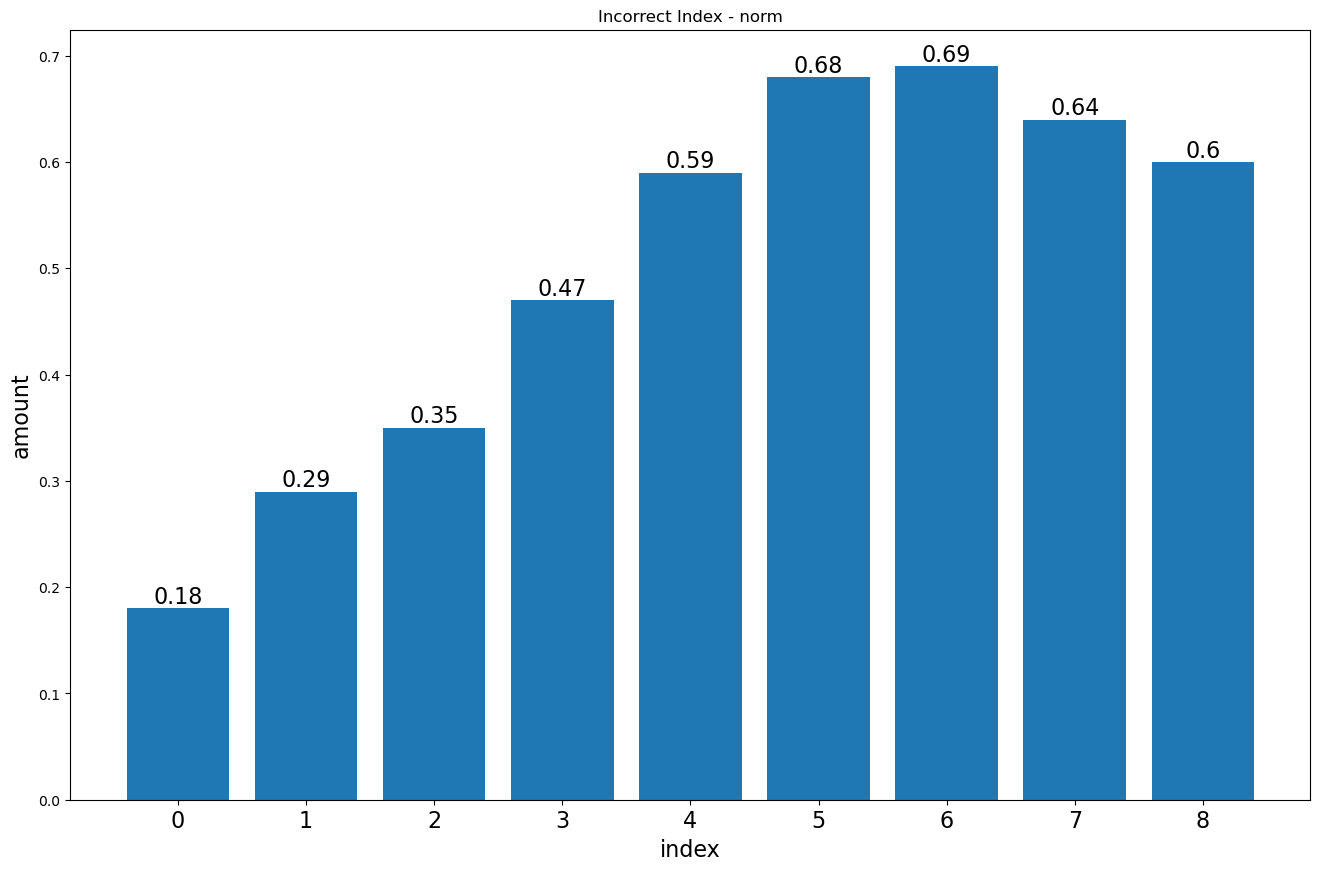

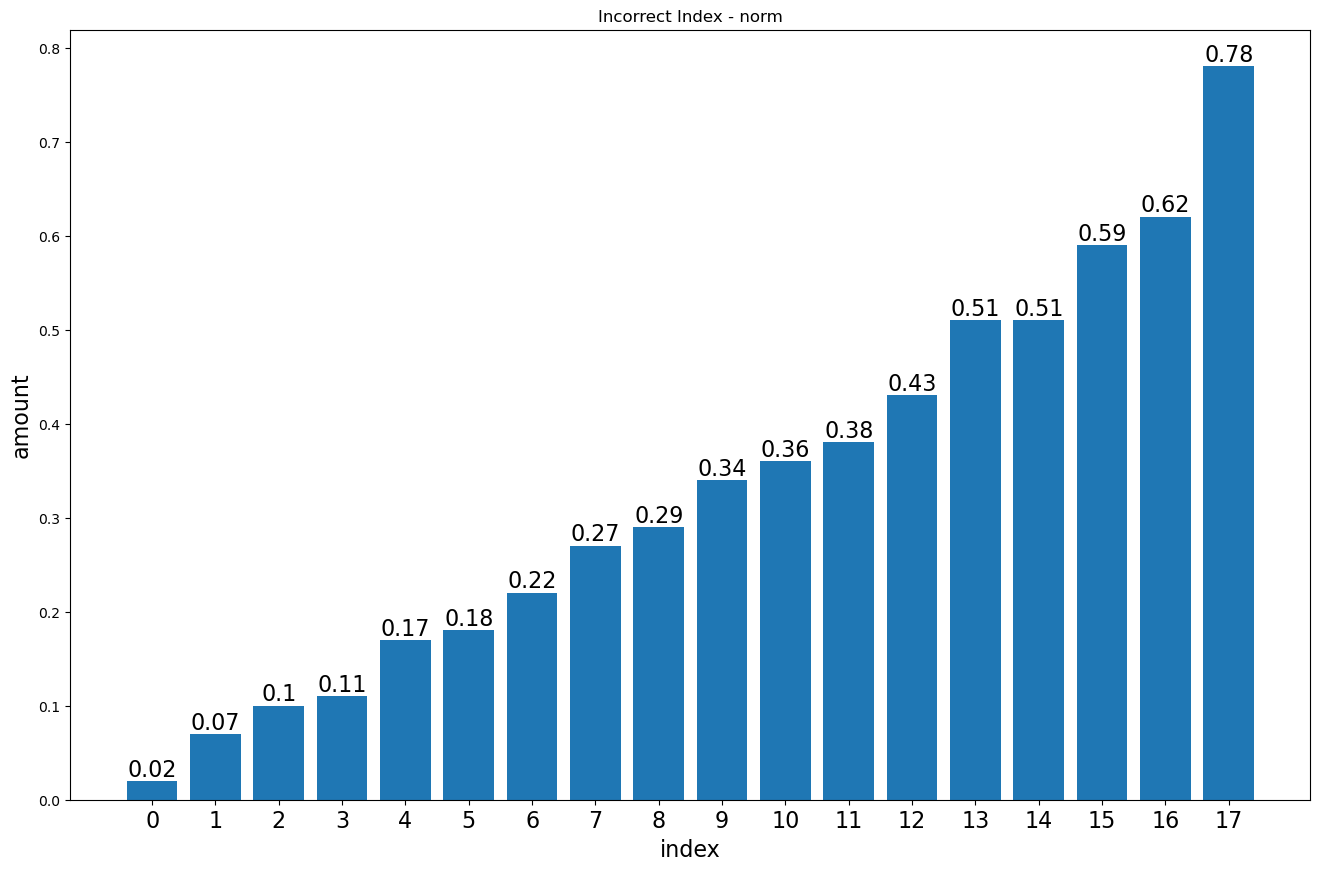

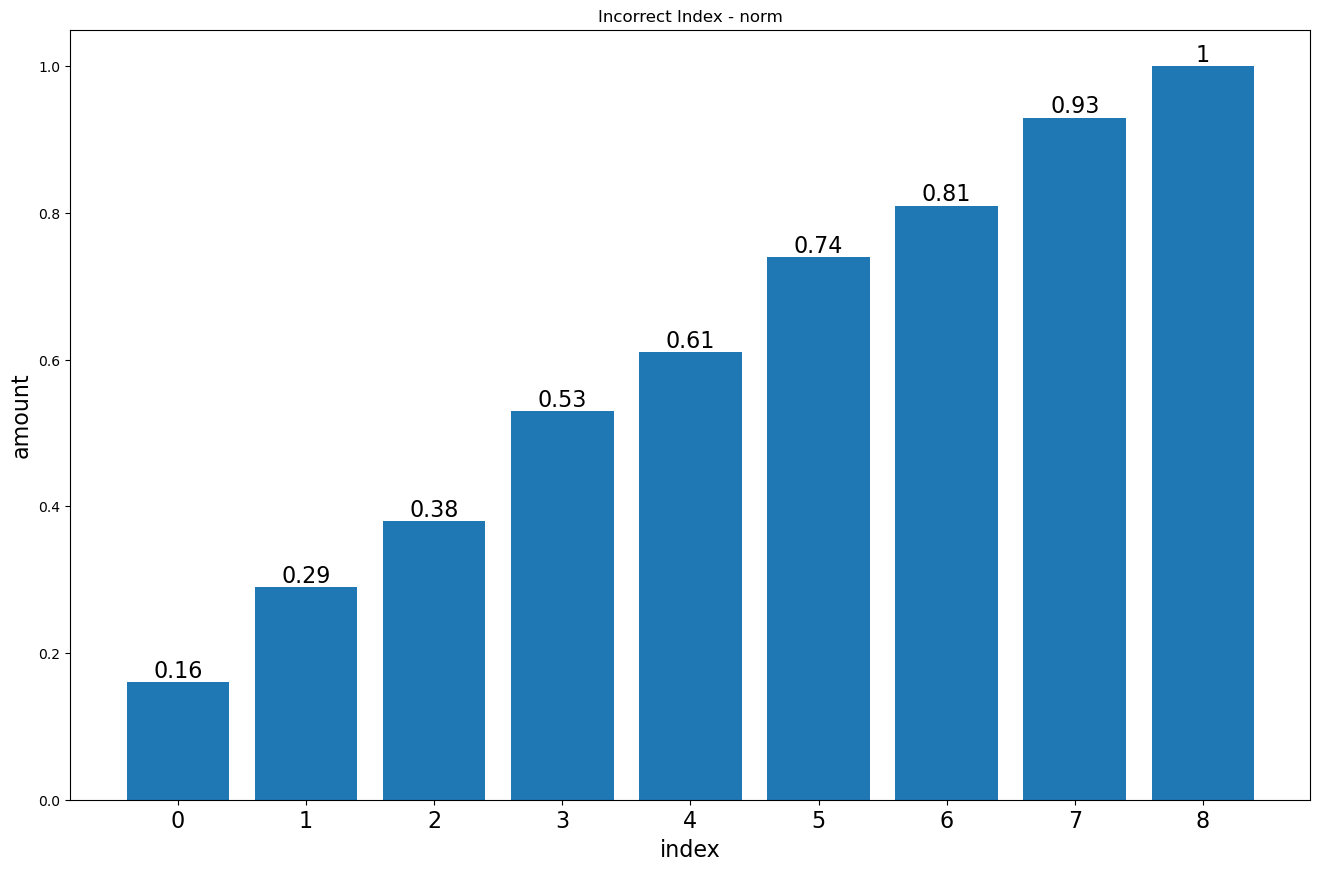

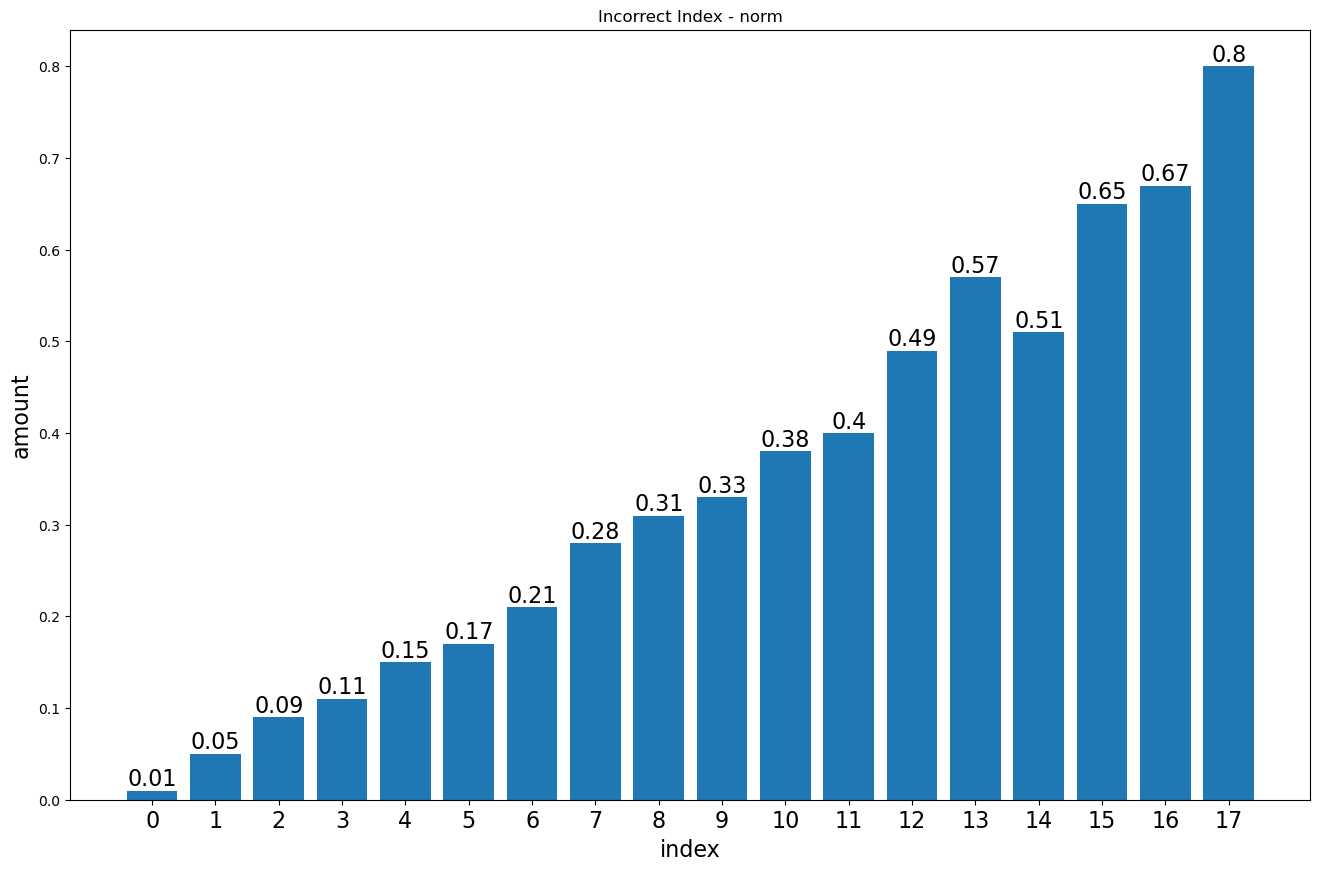

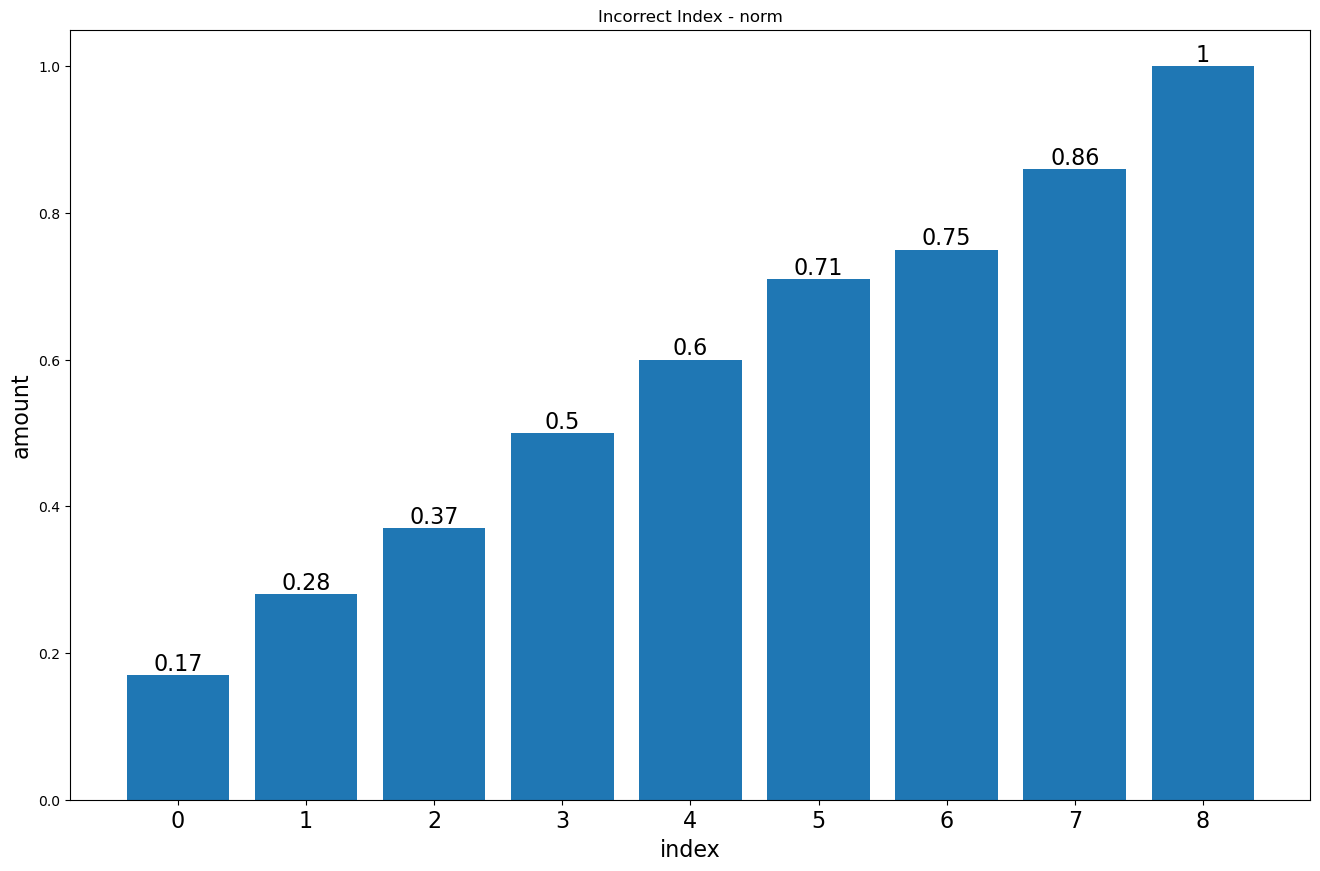

In [12]:
list_of_file = [unchunk_0, chunk_0, unchunk_1, chunk_1, unchunk_2, chunk_2]
list_of_test_file = [test_data, test_data_chunks, test_data, test_data_chunks, test_data, test_data_chunks]
for file, test_file in zip(list_of_file, list_of_test_file):
    x = find_wrong_idx(file, test_file)
    plt.figure(x)

In [13]:
test_data

,name,encode_label,decode_rhythm,gen_rhythm,split
0,sound1.wav,"[387, 69, 267, 197, 387, 60, 280, 188, 387, 69...","['16th', '8th', 'half', '16th', '16th', '8th',...","['16th', '8th', 'half', '16th', '16th', '8th',...",test
1,sound6.wav,"[387, 72, 355, 200, 387, 74, 267, 202, 387, 69...","['half', '16th', '8th', 'whole', 'quarter', 'q...","['half', '16th', '8th', 'whole', 'quarter', 'q...",test
2,sound8.wav,"[387, 71, 280, 199, 387, 71, 280, 199, 387, 55...","['8th', '8th', '8th', 'whole', '16th', 'half',...","['8th', '8th', '8th', 'whole', '16th', 'half',...",test
3,sound10.wav,"[387, 79, 355, 355, 207, 387, 71, 355, 355, 19...","['whole', 'whole', '8th', 'whole', '8th', 'who...","['whole', 'whole', '8th', 'whole', '8th', 'who...",test
4,sound11.wav,"[387, 77, 267, 205, 387, 48, 355, 176, 387, 69...","['16th', 'half', 'half', 'quarter', 'quarter',...","['16th', 'half', 'half', 'quarter', 'quarter',...",test
...,...,...,...,...,...
603,sound1985.wav,"[387, 74, 355, 355, 202, 387, 47, 355, 175, 38...","['whole', 'half', '8th', 'whole', 'quarter', '...","['whole', 'half', '8th', 'whole', 'quarter', '...",test
604,sound1989.wav,"[387, 47, 267, 175, 387, 71, 305, 199, 387, 55...","['16th', 'quarter', 'half', '8th', 'half', '16...","['16th', 'quarter', 'half', '8th', 'half', '16...",test
605,sound1990.wav,"[387, 72, 280, 200, 387, 67, 267, 195, 387, 60...","['8th', '16th', '16th', 'half', 'whole', 'quar...","['8th', '16th', '16th', 'half', 'whole', 'quar...",test
606,sound1995.wav,"[387, 77, 355, 355, 205, 387, 79, 305, 207, 38...","['whole', 'quarter', 'quarter', 'quarter', 'ha...","['whole', 'quarter', 'quarter', 'quarter', 'ha...",test


In [14]:
test_data_chunks["name"] = test_data_chunks["name"].str.replace("dataset/long_length_data/", "")
test_data_chunks

,name,start_time,end_time,encode_label,decode_rhythm
0,sound1.wav,0.0,2.000,"[387, 69, 267, 197, 387, 60, 280, 188, 387, 69...","['16th', '8th', 'half', '16th', '16th', '8th',..."
1,sound1.wav,2.0,2.625,"[387, 69, 305, 197]",['quarter']
2,sound6.wav,0.0,2.000,"[387, 72, 355, 200, 387, 74, 267, 202, 387, 69...","['half', '16th', '8th', 'whole']"
3,sound6.wav,2.0,4.000,"[387, 53, 305, 181, 387, 47, 305, 175]","['quarter', 'quarter']"
4,sound6.wav,4.0,6.000,"[387, 60, 280, 188, 387, 72, 267, 200, 387, 77...","['8th', '16th', 'whole']"
...,...,...,...,...,...
2986,sound1995.wav,4.0,6.000,"[387, 77, 355, 205, 387, 67, 305, 195, 387, 48...","['half', 'quarter', 'quarter']"
2987,sound1999.wav,0.0,2.000,"[387, 69, 305, 197, 387, 67, 355, 355, 195]","['quarter', 'whole']"
2988,sound1999.wav,2.0,4.000,"[387, 72, 267, 200, 387, 53, 355, 355, 181]","['16th', 'whole']"
2989,sound1999.wav,4.0,6.000,"[387, 60, 355, 355, 188]",['whole']


In [15]:
chunk_0 = pd.concat([chunk_0, test_data_chunks["name"]], axis=1)
chunk_1 = pd.concat([chunk_1, test_data_chunks["name"]], axis=1)
chunk_2 = pd.concat([chunk_2, test_data_chunks["name"]], axis=1)

In [16]:
for col in ['encode_target', 'encode_predict', 'decode_target', 'decode_predict']:
    chunk_0[col] = chunk_0[col].str.replace(", '<PAD>'", "")
    chunk_0[col] = chunk_0[col].str.replace(", '<EOS>'", "")
    chunk_0[col] = chunk_0[col].apply(lambda x : ast.literal_eval(x))
    chunk_1[col] = chunk_1[col].str.replace(", '<PAD>'", "")
    chunk_1[col] = chunk_1[col].str.replace(", '<EOS>'", "")
    chunk_1[col] = chunk_1[col].apply(lambda x : ast.literal_eval(x))
    chunk_2[col] = chunk_2[col].str.replace(", '<PAD>'", "")
    chunk_2[col] = chunk_2[col].str.replace(", '<EOS>'", "")
    chunk_2[col] = chunk_2[col].apply(lambda x : ast.literal_eval(x))
    unchunk_0[col] = unchunk_0[col].str.replace(", '<PAD>'", "")
    unchunk_0[col] = unchunk_0[col].str.replace(", '<EOS>'", "")
    unchunk_0[col] = unchunk_0[col].apply(lambda x : ast.literal_eval(x))
    unchunk_1[col] = unchunk_1[col].str.replace(", '<PAD>'", "")
    unchunk_1[col] = unchunk_1[col].str.replace(", '<EOS>'", "")
    unchunk_1[col] = unchunk_1[col].apply(lambda x : ast.literal_eval(x))
    unchunk_2[col] = unchunk_2[col].str.replace(", '<PAD>'", "")
    unchunk_2[col] = unchunk_2[col].str.replace(", '<EOS>'", "")
    unchunk_2[col] = unchunk_2[col].apply(lambda x : ast.literal_eval(x))

In [17]:
full_chunk_0 = chunk_0.groupby(["name"], as_index = False, sort=False).agg('sum')
full_chunk_1 = chunk_1.groupby(["name"], as_index = False, sort=False).agg('sum')
full_chunk_2 = chunk_2.groupby(["name"], as_index = False, sort=False).agg('sum')

In [18]:
full_chunk_0

,name,encode_target,encode_predict,decode_target,decode_predict
0,sound1.wav,"[387, 69, 267, 197, 387, 60, 280, 188, 387, 69...","[387, 69, 267, 197, 387, 60, 280, 188, 387, 69...","[16th, 8th, half, 16th, 16th, 8th, 16th, 16th,...","[16th, 8th, half, 16th, 16th, 8th, whole, half]"
1,sound6.wav,"[387, 72, 355, 200, 387, 74, 267, 202, 387, 69...","[387, 72, 355, 200, 387, 74, 267, 202, 387, 69...","[half, 16th, 8th, whole, quarter, quarter, 8th...","[half, 16th, 8th, half, quarter, whole, 8th, 1..."
2,sound8.wav,"[387, 71, 280, 199, 387, 71, 280, 199, 387, 55...","[387, 71, 280, 199, 387, 71, 280, 199, 387, 55...","[8th, 8th, 8th, whole, 16th, half, 8th, whole,...","[8th, 8th, 8th, whole, 16th, half, half, whole..."
3,sound10.wav,"[387, 79, 355, 355, 207, 387, 71, 355, 355, 19...","[387, 79, 355, 355, 207, 387, 71, 355, 199, 38...","[whole, whole, 8th, whole, 8th, whole, whole, ...","[whole, half, whole, whole, 8th, whole, whole,..."
4,sound11.wav,"[387, 77, 267, 205, 387, 48, 355, 176, 387, 69...","[387, 77, 267, 205, 387, 48, 355, 176, 387, 69...","[16th, half, half, quarter, quarter, 8th, quar...","[16th, half, half, quarter, quarter, 8th, quar..."
...,...,...,...,...,...
603,sound1985.wav,"[387, 74, 355, 355, 202, 387, 47, 355, 175, 38...","[387, 74, 355, 355, 202, 387, 79, 355, 207, 38...","[whole, half, 8th, whole, quarter, 8th, 16th, ...","[whole, half, 8th, whole, quarter, whole, whol..."
604,sound1989.wav,"[387, 47, 267, 175, 387, 71, 305, 199, 387, 55...","[387, 47, 267, 175, 387, 71, 305, 199, 387, 55...","[16th, quarter, half, 8th, half, 16th, quarter...","[16th, quarter, half, 8th, half, 16th, quarter..."
605,sound1990.wav,"[387, 72, 280, 200, 387, 67, 267, 195, 387, 60...","[387, 72, 280, 200, 387, 67, 267, 195, 387, 60...","[8th, 16th, 16th, half, whole, quarter, whole,...","[8th, 16th, 16th, half, quarter, half, whole, ..."
606,sound1995.wav,"[387, 77, 355, 355, 205, 387, 79, 305, 207, 38...","[387, 77, 355, 355, 205, 387, 72, 355, 200, 38...","[whole, quarter, quarter, quarter, half, half,...","[whole, half, quarter, quarter, quarter, quart..."


In [19]:
full_chunk_0.to_csv("testtemp.csv", index=False)

In [20]:
unchunk_0

,encode_target,encode_predict,decode_target,decode_predict
0,"[387, 69, 267, 197, 387, 60, 280, 188, 387, 69...","[387, 69, 267, 197, 387, 60, 280, 188, 387, 69...","[16th, 8th, half, 16th, 16th, 8th, 16th, 16th,...","[16th, 8th, half, 16th, 16th, 8th, 8th, quarter]"
1,"[387, 72, 355, 200, 387, 74, 267, 202, 387, 69...","[387, 72, 355, 200, 387, 74, 267, 202, 387, 69...","[half, 16th, 8th, whole, quarter, quarter, 8th...","[half, 16th, 8th, whole, quarter, quarter, 8th..."
2,"[387, 71, 280, 199, 387, 71, 280, 199, 387, 55...","[387, 71, 280, 199, 387, 71, 280, 199, 387, 55...","[8th, 8th, 8th, whole, 16th, half, 8th, whole,...","[8th, 8th, 8th, whole, 16th, half, 8th, whole,..."
3,"[387, 79, 355, 355, 207, 387, 71, 355, 355, 19...","[387, 79, 355, 355, 207, 387, 71, 355, 355, 19...","[whole, whole, 8th, whole, 8th, whole, whole, ...","[whole, whole, 8th, whole, 8th, whole, whole, ..."
4,"[387, 77, 267, 205, 387, 48, 355, 176, 387, 69...","[387, 77, 267, 205, 387, 48, 355, 176, 387, 69...","[16th, half, half, quarter, quarter, 8th, quar...","[16th, half, half, quarter, quarter, 8th, quar..."
...,...,...,...,...
603,"[387, 74, 355, 355, 202, 387, 47, 355, 175, 38...","[387, 74, 355, 355, 202, 387, 47, 355, 175, 38...","[whole, half, 8th, whole, quarter, 8th, 16th, ...","[whole, half, 8th, whole, half, 8th, whole, 8t..."
604,"[387, 47, 267, 175, 387, 71, 305, 199, 387, 55...","[387, 47, 267, 175, 387, 71, 305, 199, 387, 55...","[16th, quarter, half, 8th, half, 16th, quarter...","[16th, quarter, half, 8th, half, 16th, quarter..."
605,"[387, 72, 280, 200, 387, 67, 267, 195, 387, 60...","[387, 72, 280, 200, 387, 67, 267, 195, 387, 60...","[8th, 16th, 16th, half, whole, quarter, whole,...","[8th, 16th, 16th, half, whole, quarter, whole,..."
606,"[387, 77, 355, 355, 205, 387, 79, 305, 207, 38...","[387, 77, 355, 355, 205, 387, 79, 305, 207, 38...","[whole, quarter, quarter, quarter, half, half,...","[whole, quarter, quarter, quarter, half, half,..."


('77.9048%', '66.3388%', '73.5101%')
('49.2159%', '8.2934%', '54.8858%')


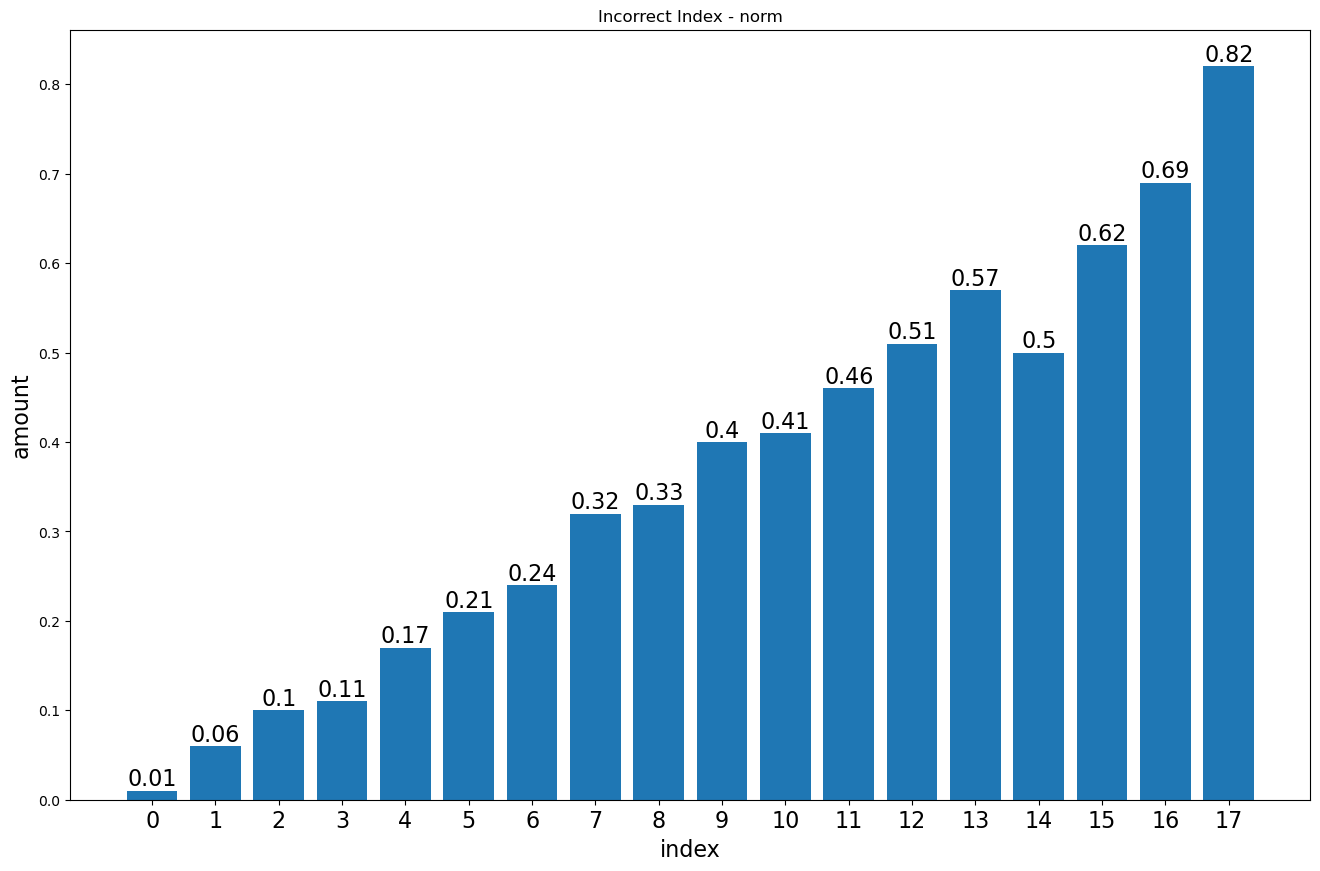

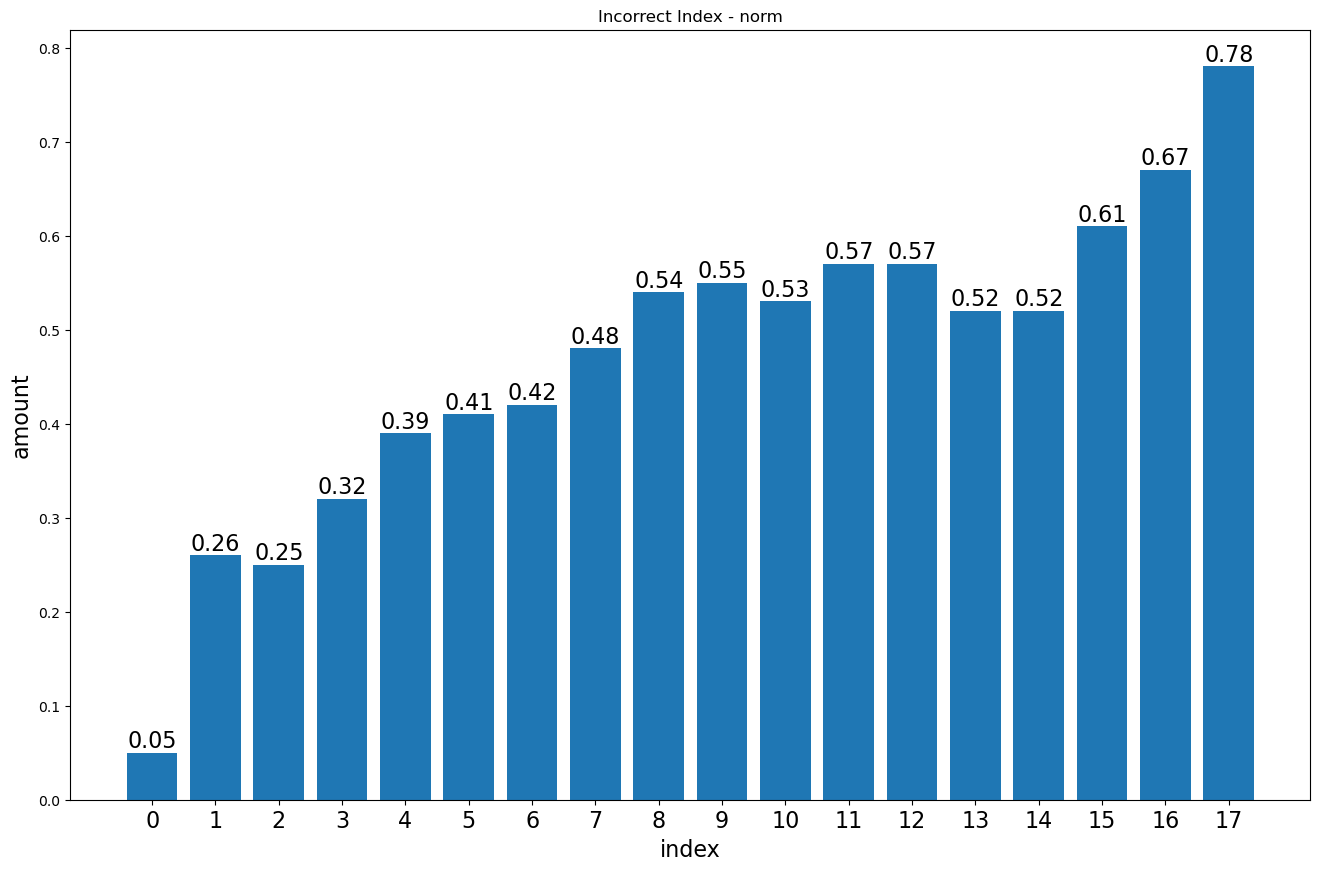

In [21]:
list_of_file = [unchunk_0, full_chunk_0]
for file in list_of_file:
    print(find_acc(file, test_data))

for file in list_of_file:
    x = find_wrong_idx(file, test_data)
    plt.figure(x)


('81.1962%', '72.3471%', '77.7211%')
('48.8391%', '10.2625%', '54.7737%')


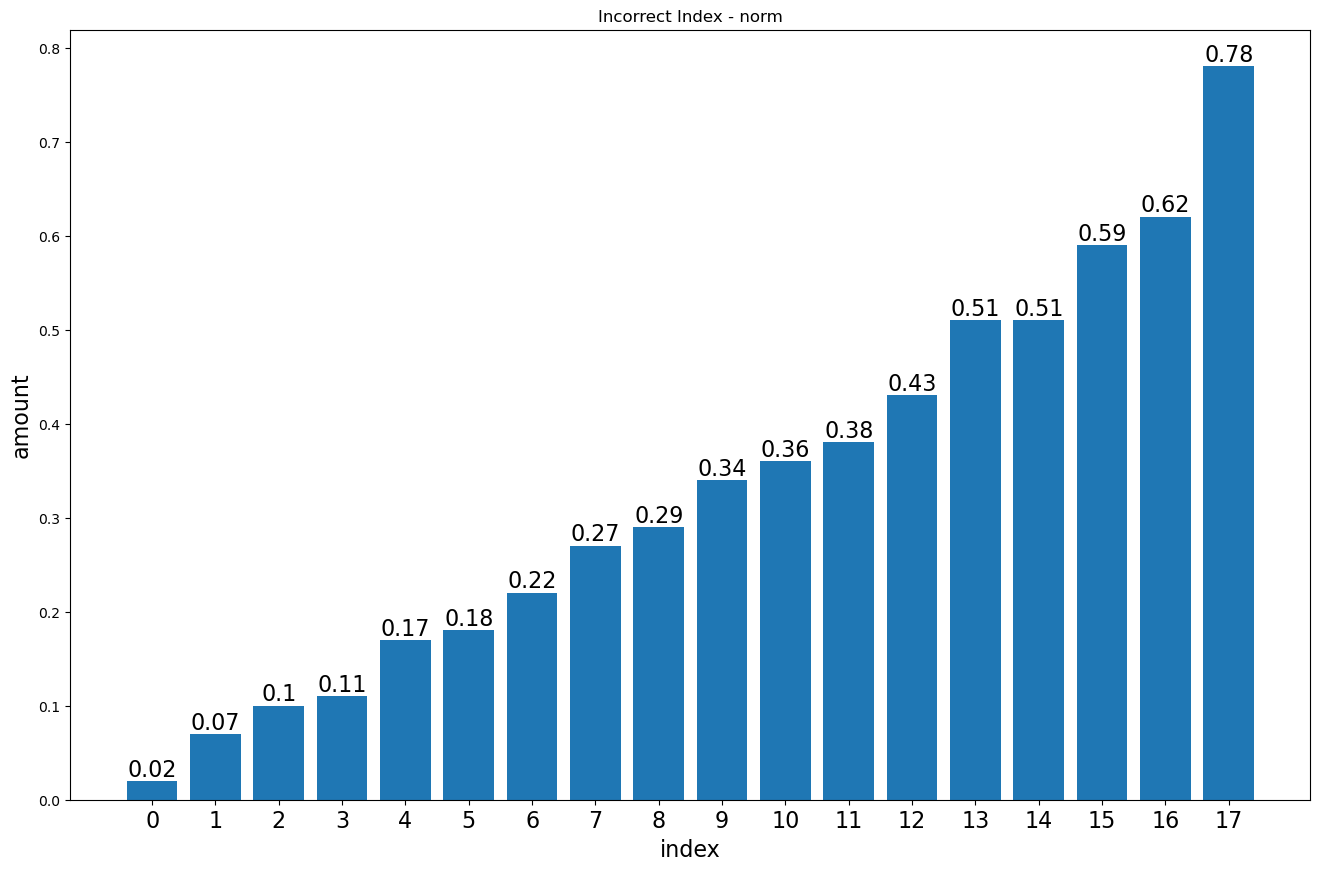

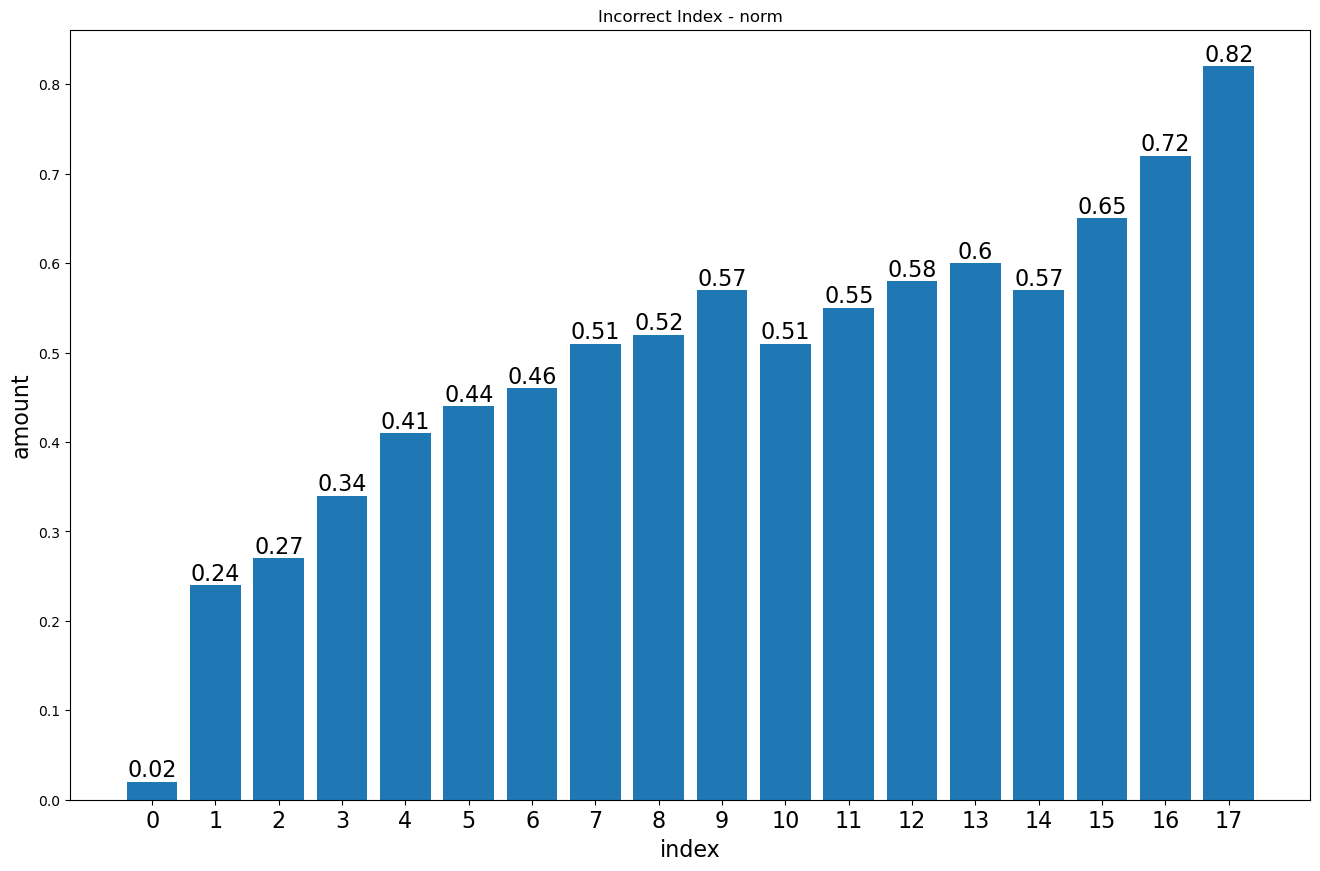

In [22]:
list_of_file = [unchunk_1, full_chunk_1]
for file in list_of_file:
    print(find_acc(file, test_data))

for file in list_of_file:
    x = find_wrong_idx(file, test_data)
    plt.figure(x)

('80.8167%', '71.9905%', '76.9776%')
('49.0485%', '5.3338%', '56.4868%')


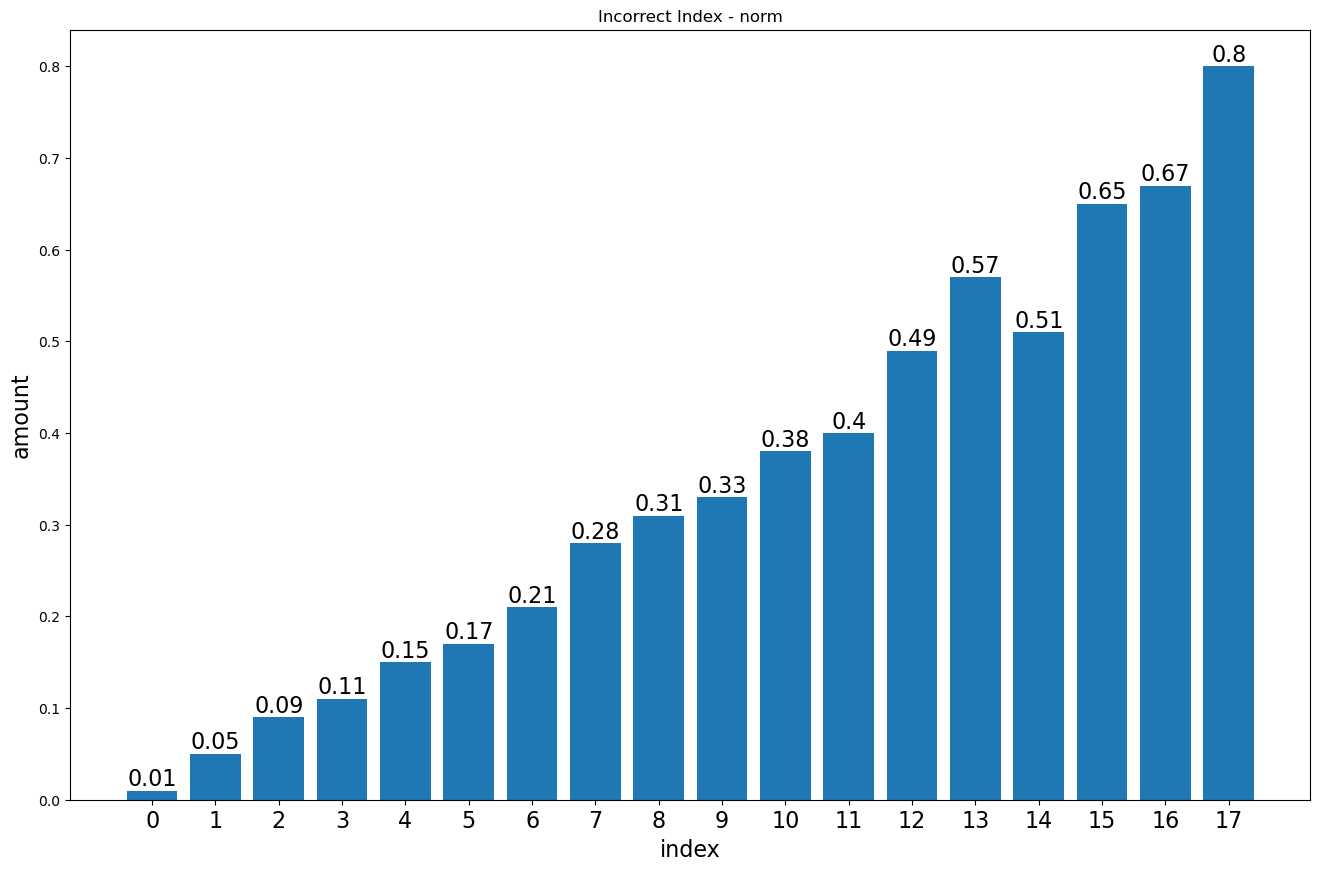

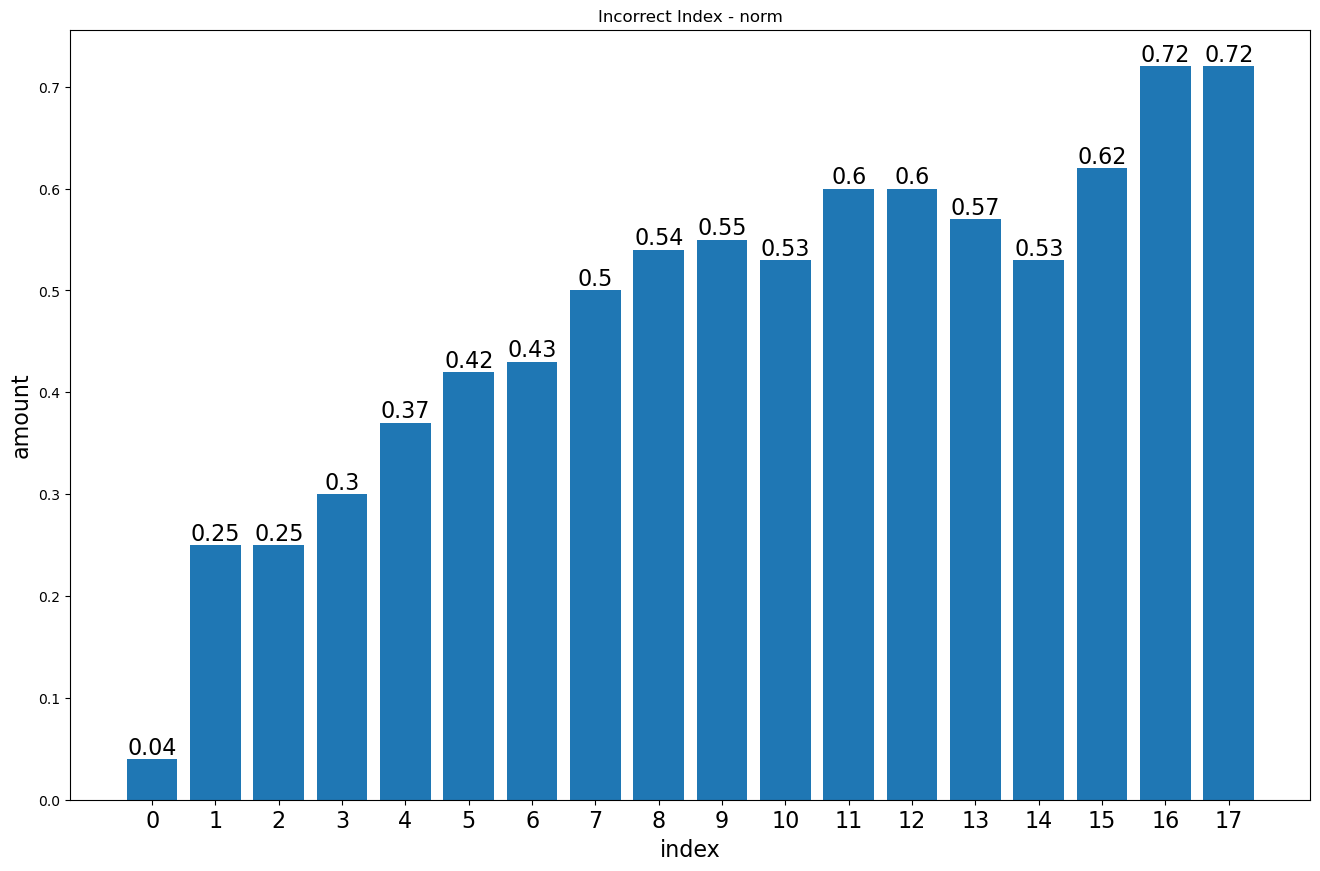

In [23]:
list_of_file = [unchunk_2, full_chunk_2]
for file in list_of_file:
    print(find_acc(file, test_data))

for file in list_of_file:
    x = find_wrong_idx(file, test_data)
    plt.figure(x)

In [8]:
test_unchunk_0 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_020241001-2304/sampleaudio3_longlength_nochunk.csv")
test_unchunk_1 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_120241001-1916/sampleaudio3_longlength_nochunk.csv")
test_unchunk_2 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_220241001-2305/sampleaudio3_longlength_nochunk.csv")

test_chunk_0 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_020241026-0153/sample_audio3_30note.csv")
test_chunk_1 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_120241026-0155/sample_audio3_30note.csv")
test_chunk_2 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_220241026-0155/sample_audio3_30note.csv")

test_30note = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/dataset/sample_audio3_30note/train_metadata.csv")
test_30note_chunk = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/dataset/sample_audio3_30note/metadata_chunks2.csv")

In [123]:
test_30note_chunk["name"] = test_30note_chunk["name"].str.replace("dataset/sample_audio3_30note/", "")
test_30note_chunk

,name,start_time,end_time,encode_label,decode_rhythm
0,sound0.wav,0.0,2.0,"[387, 60, 355, 188, 387, 47, 355, 355, 175]","['half', 'whole']"
1,sound0.wav,2.0,4.0,"[387, 47, 305, 175, 387, 67, 305, 195, 387, 77...","['quarter', 'quarter', '8th']"
2,sound0.wav,4.0,6.0,"[387, 77, 305, 205, 387, 74, 280, 202, 387, 69...","['quarter', '8th', '16th', 'half']"
3,sound0.wav,6.0,8.0,"[387, 48, 280, 176, 387, 74, 355, 355, 202]","['8th', 'whole']"
4,sound0.wav,8.0,10.0,"[387, 71, 355, 199, 387, 71, 355, 355, 199]","['half', 'whole']"
5,sound0.wav,10.0,12.0,"[387, 77, 305, 205, 387, 55, 280, 183]","['quarter', '8th']"
6,sound0.wav,12.0,14.0,"[387, 48, 267, 176, 387, 69, 267, 197, 387, 77...","['16th', '16th', 'quarter', 'quarter', 'half']"
7,sound0.wav,14.0,16.0,"[387, 48, 305, 176, 387, 53, 355, 181, 387, 79...","['quarter', 'half', '8th']"
8,sound0.wav,16.0,18.0,"[387, 72, 280, 200, 387, 71, 305, 199, 387, 77...","['8th', 'quarter', 'half', 'half']"
9,sound0.wav,18.0,20.0,"[387, 74, 355, 202, 387, 67, 280, 195]","['half', '8th']"


In [124]:
test_chunk_0 = pd.concat([test_chunk_0, test_30note_chunk["name"]], axis=1)
test_chunk_1 = pd.concat([test_chunk_1, test_30note_chunk["name"]], axis=1)
test_chunk_2 = pd.concat([test_chunk_2, test_30note_chunk["name"]], axis=1)

In [125]:
test_chunk_0

,encode_target,encode_predict,decode_target,decode_predict,name
0,"[387, 60, 355, 188, 387, 47, 355, 355, 175]","[387, 60, 355, 188, 387, 47, 355, 355, 175]","['half', 'whole', '<EOS>']","['half', 'whole', '<EOS>']",sound0.wav
1,"[387, 47, 305, 175, 387, 67, 305, 195, 387, 77...","[387, 47, 305, 175, 387, 67, 355, 195]","['quarter', 'quarter', '8th', '<EOS>']","['quarter', 'half', '<EOS>', '<PAD>']",sound0.wav
2,"[387, 77, 305, 205, 387, 74, 280, 202, 387, 69...","[387, 77, 305, 205, 387, 74, 280, 202, 387, 69...","['quarter', '8th', '16th', 'half', '<EOS>', '<...","['quarter', '8th', '16th', 'half', 'half', '<E...",sound0.wav
3,"[387, 48, 280, 176, 387, 74, 355, 355, 202]","[387, 48, 280, 176, 387, 74, 355, 355, 202]","['8th', 'whole', '<EOS>']","['8th', 'whole', '<EOS>']",sound0.wav
4,"[387, 71, 355, 199, 387, 71, 355, 355, 199]","[387, 71, 355, 199, 387, 71, 355, 199]","['half', 'whole', '<EOS>']","['half', 'half', '<EOS>']",sound0.wav
5,"[387, 77, 305, 205, 387, 55, 280, 183]","[387, 77, 305, 205, 387, 55, 355, 183]","['quarter', '8th', '<EOS>']","['quarter', 'half', '<EOS>']",sound0.wav
6,"[387, 48, 267, 176, 387, 69, 267, 197, 387, 77...","[387, 69, 267, 197, 387, 77, 305, 205, 387, 48...","['16th', '16th', 'quarter', 'quarter', 'half',...","['16th', 'quarter', 'quarter', 'half', '<EOS>'...",sound0.wav
7,"[387, 48, 305, 176, 387, 53, 355, 181, 387, 79...","[387, 48, 305, 176, 387, 53, 355, 181, 387, 79...","['quarter', 'half', '8th', '<EOS>', '<PAD>']","['quarter', 'half', '16th', 'half', '<EOS>']",sound0.wav
8,"[387, 72, 280, 200, 387, 71, 305, 199, 387, 77...","[387, 72, 280, 200, 387, 71, 305, 199, 387, 77...","['8th', 'quarter', 'half', 'half', '<EOS>']","['8th', 'quarter', 'half', 'half', '<EOS>']",sound0.wav
9,"[387, 74, 355, 202, 387, 67, 280, 195]","[387, 74, 355, 202, 387, 67, 355, 195]","['half', '8th', '<EOS>']","['half', 'half', '<EOS>']",sound0.wav


In [126]:
for col in ['encode_target', 'encode_predict', 'decode_target', 'decode_predict']:
    test_chunk_0[col] = test_chunk_0[col].str.replace(", '<PAD>'", "")
    test_chunk_0[col] = test_chunk_0[col].str.replace(", '<EOS>'", "")
    test_chunk_0[col] = test_chunk_0[col].apply(lambda x : ast.literal_eval(x))
    test_chunk_1[col] = test_chunk_1[col].str.replace(", '<PAD>'", "")
    test_chunk_1[col] = test_chunk_1[col].str.replace(", '<EOS>'", "")
    test_chunk_1[col] = test_chunk_1[col].apply(lambda x : ast.literal_eval(x))
    test_chunk_2[col] = test_chunk_2[col].str.replace(", '<PAD>'", "")
    test_chunk_2[col] = test_chunk_2[col].str.replace(", '<EOS>'", "")
    test_chunk_2[col] = test_chunk_2[col].apply(lambda x : ast.literal_eval(x))
    test_unchunk_0[col] = test_unchunk_0[col].str.replace(", '<PAD>'", "")
    test_unchunk_0[col] = test_unchunk_0[col].str.replace(", '<EOS>'", "")
    test_unchunk_0[col] = test_unchunk_0[col].apply(lambda x : ast.literal_eval(x))
    test_unchunk_1[col] = test_unchunk_1[col].str.replace(", '<PAD>'", "")
    test_unchunk_1[col] = test_unchunk_1[col].str.replace(", '<EOS>'", "")
    test_unchunk_1[col] = test_unchunk_1[col].apply(lambda x : ast.literal_eval(x))
    test_unchunk_2[col] = test_unchunk_2[col].str.replace(", '<PAD>'", "")
    test_unchunk_2[col] = test_unchunk_2[col].str.replace(", '<EOS>'", "")
    test_unchunk_2[col] = test_unchunk_2[col].apply(lambda x : ast.literal_eval(x))

In [127]:
test_chunk_0 = test_chunk_0.groupby(["name"], as_index=False, sort=False).agg('sum')
test_chunk_1 = test_chunk_1.groupby(["name"], as_index=False, sort=False).agg('sum')
test_chunk_2 = test_chunk_2.groupby(["name"], as_index=False, sort=False).agg('sum')

In [128]:
test_chunk_0

,name,encode_target,encode_predict,decode_target,decode_predict
0,sound0.wav,"[387, 60, 355, 188, 387, 47, 355, 355, 175, 38...","[387, 60, 355, 188, 387, 47, 355, 355, 175, 38...","[half, whole, quarter, quarter, 8th, quarter, ...","[half, whole, quarter, half, quarter, 8th, 16t..."


In [129]:
test_30note

,name,encode_label,decode_rhythm,gen_rhythm,split
0,sound0.wav,"[387, 60, 355, 188, 387, 47, 355, 355, 175, 38...","['half', 'whole', 'quarter', 'quarter', '8th',...","['half', 'whole', 'quarter', 'quarter', '8th',...",train


('16.9355%', '-35.2941%', '20.0000%')
('34.6774%', '-17.6471%', '53.3333%')


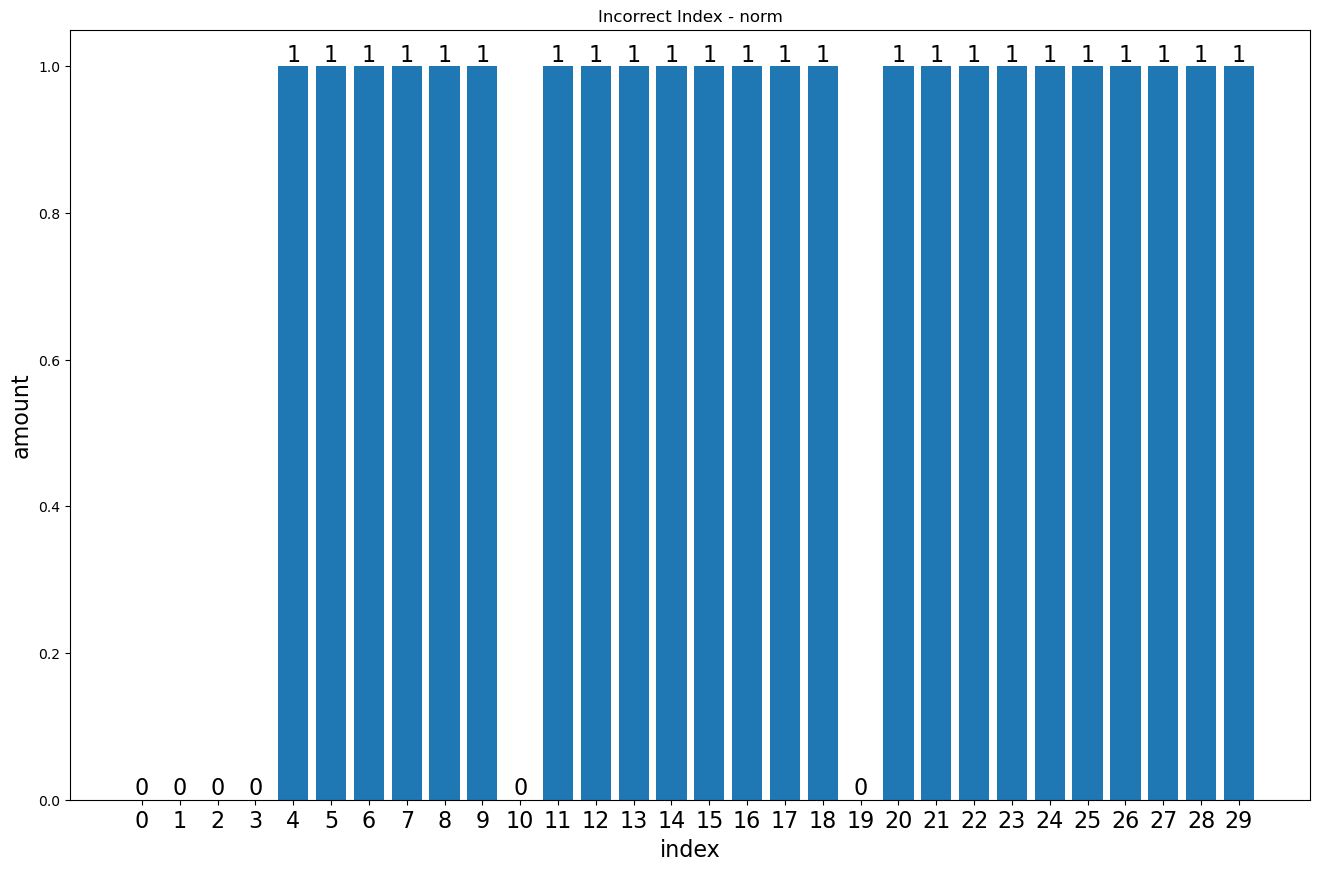

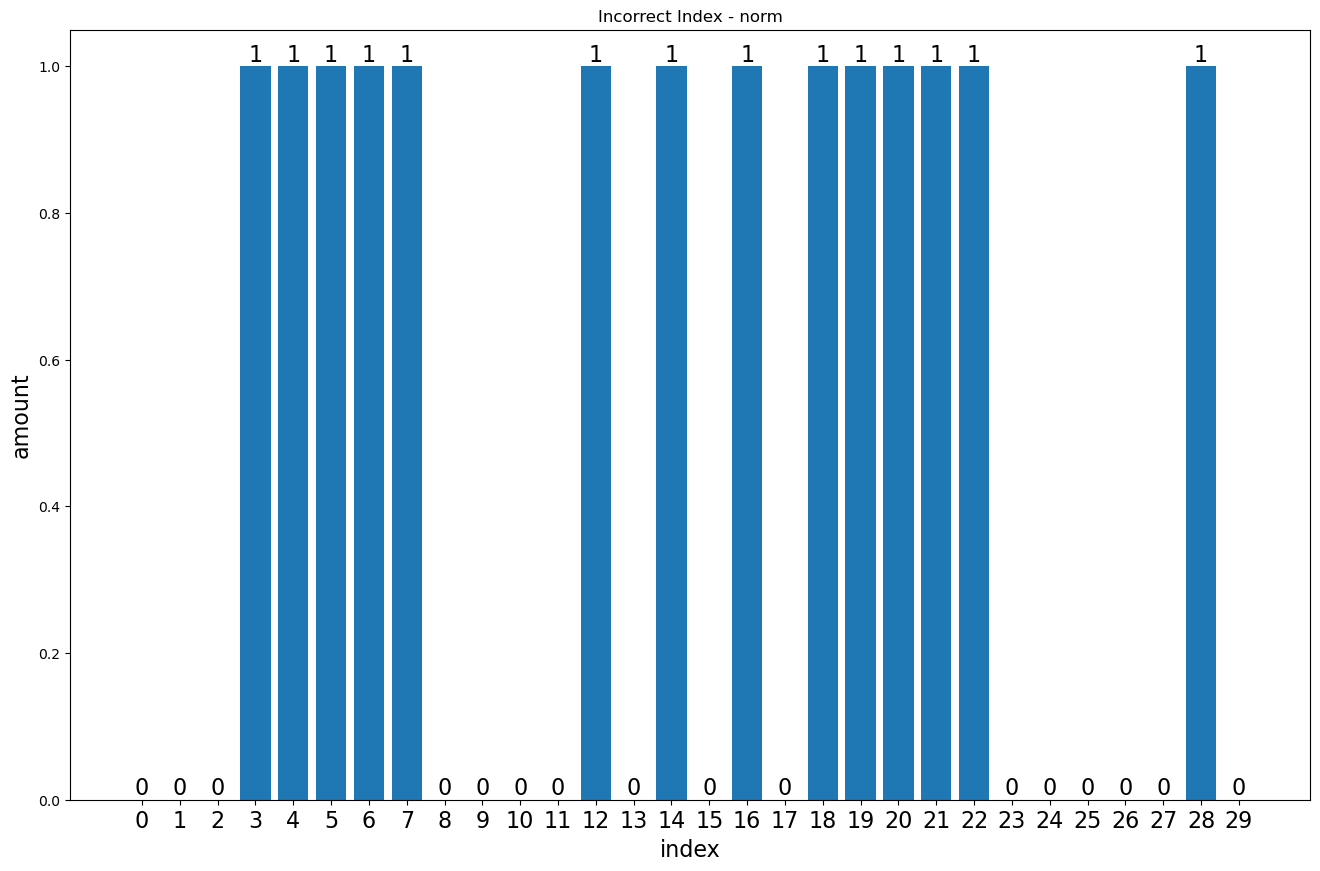

In [131]:
list_of_file = [test_unchunk_0, test_chunk_0]
list_of_test_file = [test_30note, test_30note]

for file, test_file in zip(list_of_file, list_of_test_file):
    print(find_acc(file, test_file))

for file in list_of_file:
    x = find_wrong_idx(file, test_file)
    plt.figure(x)

('15.3226%', '-50.0000%', '26.6667%')
('41.4062%', '8.8235%', '45.1613%')


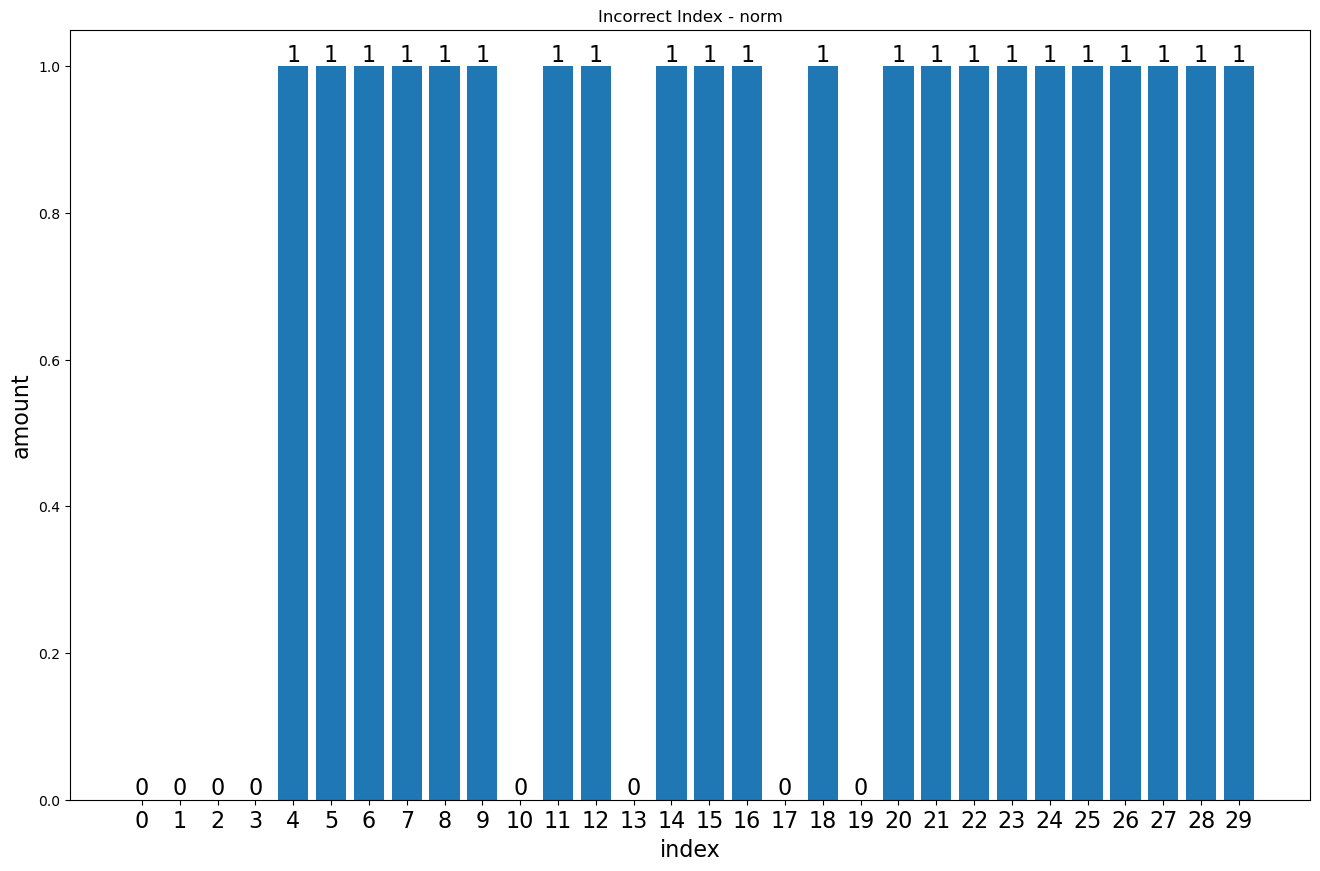

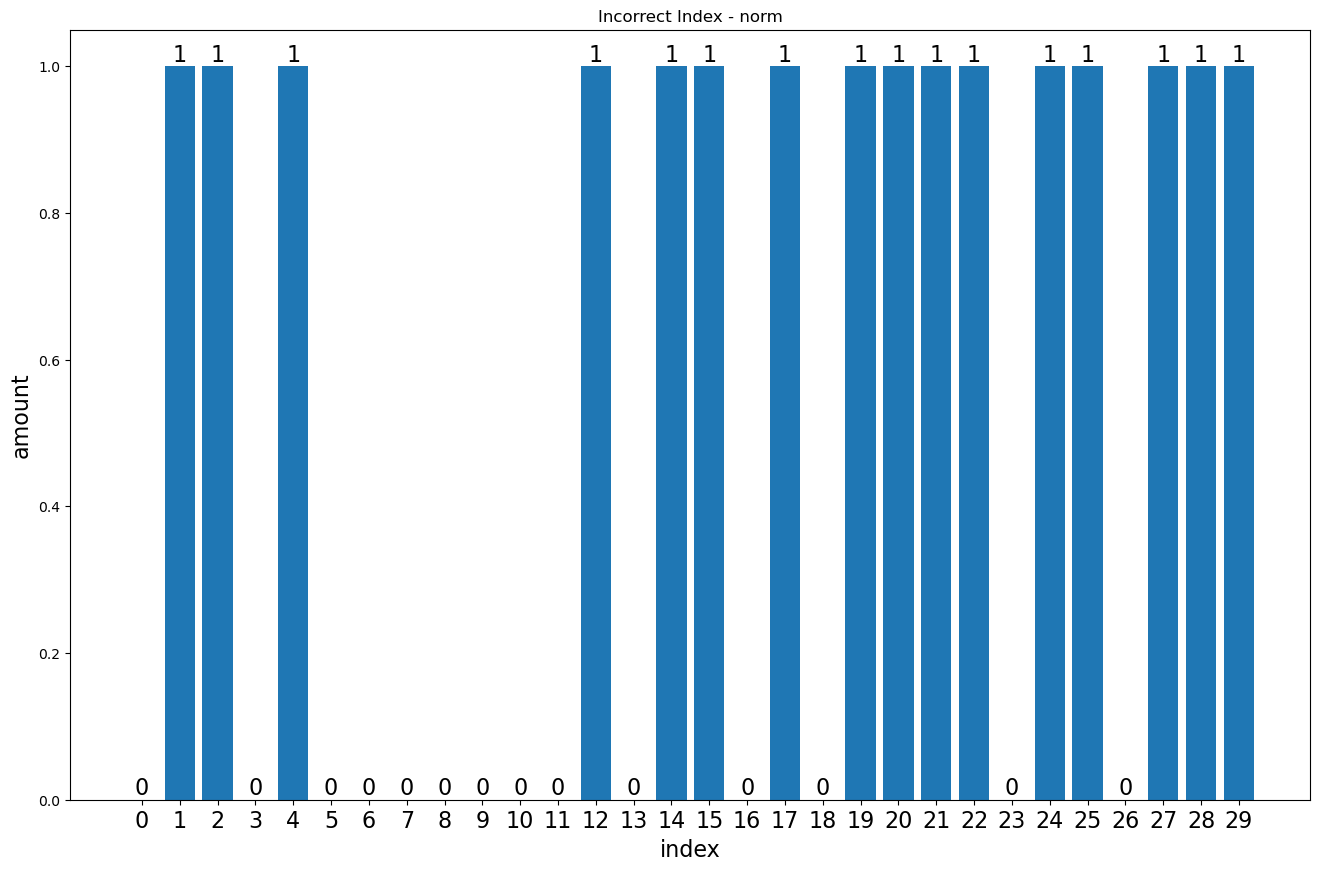

In [132]:
list_of_file = [test_unchunk_1, test_chunk_1]
list_of_test_file = [test_30note, test_30note]

for file, test_file in zip(list_of_file, list_of_test_file):
    print(find_acc(file, test_file))

for file in list_of_file:
    x = find_wrong_idx(file, test_file)
    plt.figure(x)

('41.9355%', '26.4706%', '36.6667%')
('37.0968%', '11.7647%', '33.3333%')


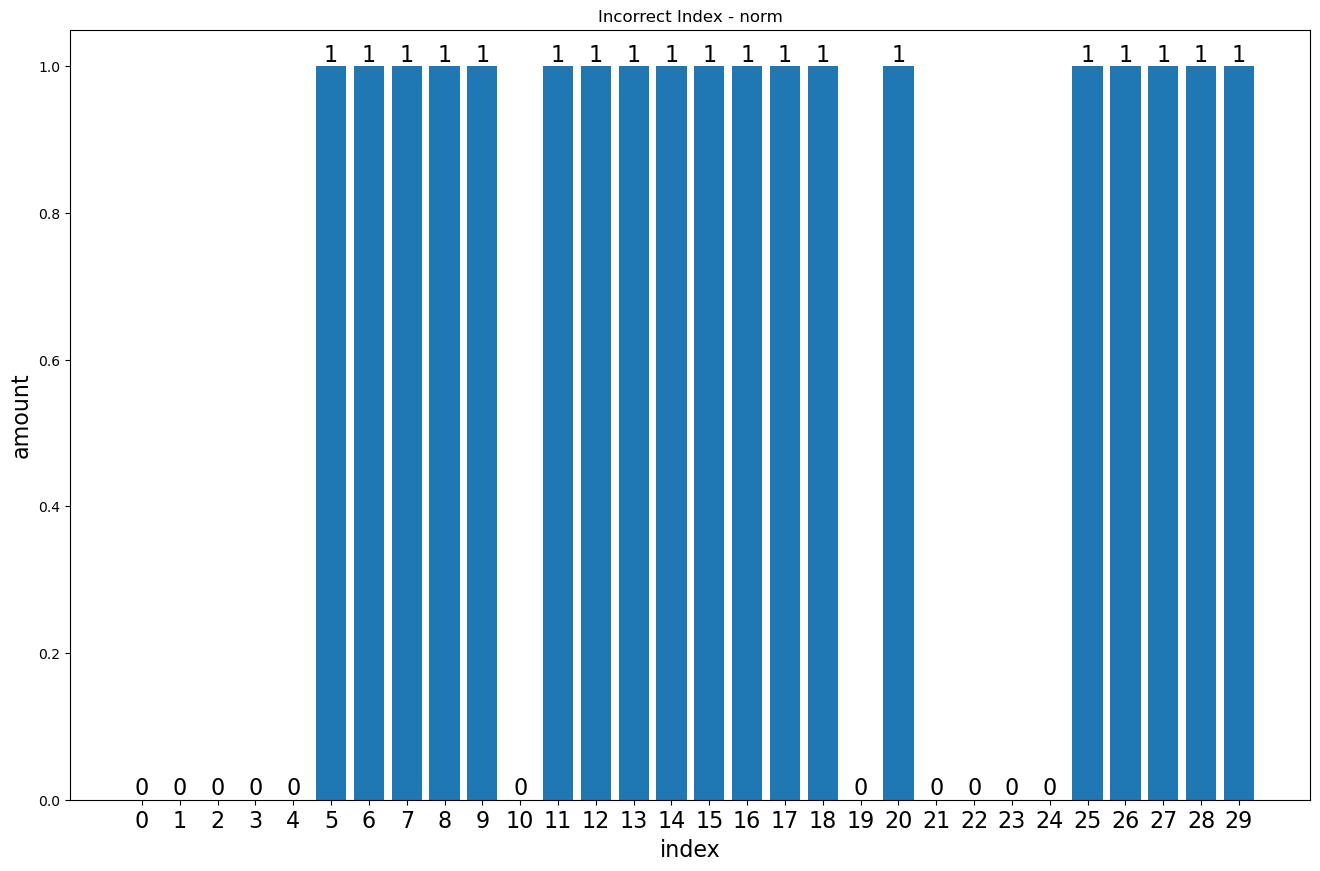

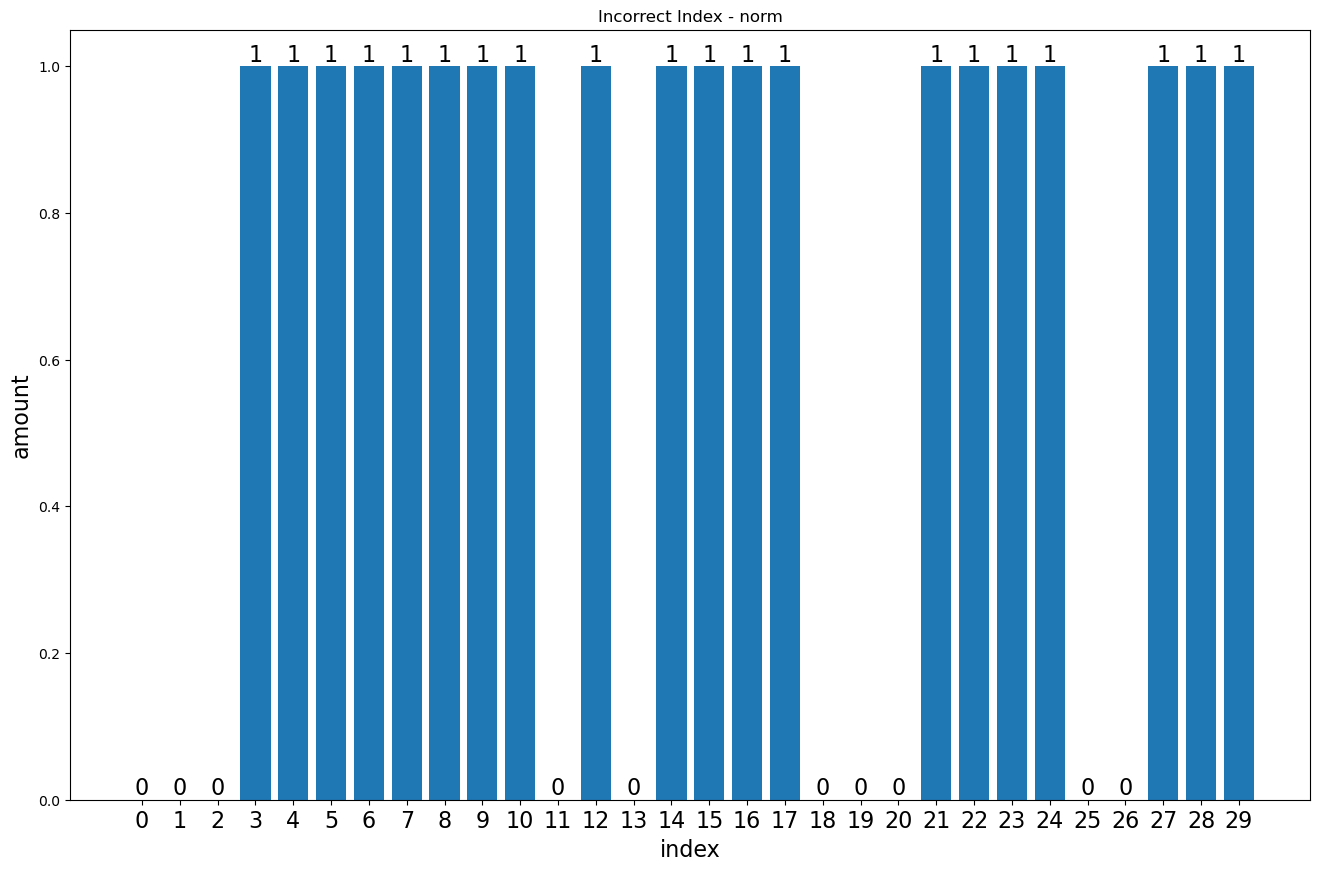

In [133]:
list_of_file = [test_unchunk_2, test_chunk_2]
list_of_test_file = [test_30note, test_30note]

for file, test_file in zip(list_of_file, list_of_test_file):
    print(find_acc(file, test_file))

for file in list_of_file:
    x = find_wrong_idx(file, test_file)
    plt.figure(x)

# Test Long Data

In [13]:
test_unchunk_0 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_020241001-2304/test_long_data2.csv")
test_unchunk_1 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_120241001-1916/test_long_data2.csv")
test_unchunk_2 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/08_midilike/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_220241001-2305/test_long_data2.csv")

test_chunk_0 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_020241026-0153/test_long_data2.csv")
test_chunk_1 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_120241026-0155/test_long_data2.csv")
test_chunk_2 = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/09_chunks/log/dataset/long_length_data/transformer_linear_dataset/long_length_data_220241026-0155/test_long_data2.csv")

test_long_data = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/dataset/test_long_data2/metadata.csv")
test_long_data_chunk = pd.read_csv("/home/bev/nanoth/0rhythm_tempo_pj2/dataset/test_long_data2/metadata_chunks.csv")

In [7]:
test_long_data_chunk["name"] = test_long_data_chunk["name"].str.replace("dataset/test_long_data2/", "")
test_long_data_chunk

,name,start_time,end_time,encode_label,decode_rhythm
0,sound0.wav,0.0,2.000,"[387, 77, 355, 355, 205, 387, 69, 267, 197]","['whole', '16th']"
1,sound0.wav,2.0,4.000,"[387, 60, 355, 188, 387, 52, 267, 180, 387, 53...","['half', '16th', 'whole']"
2,sound0.wav,4.0,6.000,"[387, 50, 267, 178, 387, 48, 355, 355, 176]","['16th', 'whole']"
3,sound0.wav,6.0,8.000,"[387, 79, 280, 207, 387, 60, 305, 188]","['8th', 'quarter']"
4,sound0.wav,8.0,10.000,"[387, 76, 355, 204, 387, 69, 305, 197, 387, 47...","['half', 'quarter', 'whole']"
...,...,...,...,...,...
875,sound29.wav,54.0,56.000,"[387, 52, 305, 180, 387, 76, 267, 204, 387, 79...","['quarter', '16th', '16th', 'whole']"
876,sound29.wav,56.0,58.000,"[387, 50, 355, 355, 178]",['whole']
877,sound29.wav,58.0,60.000,"[387, 79, 355, 355, 207]",['whole']
878,sound29.wav,60.0,62.000,"[387, 58, 305, 186]",['quarter']


In [26]:
test_chunk_0 = pd.concat([test_chunk_0, test_long_data_chunk["name"]], axis=1)
test_chunk_1 = pd.concat([test_chunk_1, test_long_data_chunk["name"]], axis=1)
test_chunk_2 = pd.concat([test_chunk_2, test_long_data_chunk["name"]], axis=1)

In [27]:
for col in ['encode_target', 'encode_predict', 'decode_target', 'decode_predict']:
    test_chunk_0[col] = test_chunk_0[col].str.replace(", '<PAD>'", "")
    test_chunk_0[col] = test_chunk_0[col].str.replace(", '<EOS>'", "")
    test_chunk_0[col] = test_chunk_0[col].apply(lambda x : ast.literal_eval(x))
    test_chunk_1[col] = test_chunk_1[col].str.replace(", '<PAD>'", "")
    test_chunk_1[col] = test_chunk_1[col].str.replace(", '<EOS>'", "")
    test_chunk_1[col] = test_chunk_1[col].apply(lambda x : ast.literal_eval(x))
    test_chunk_2[col] = test_chunk_2[col].str.replace(", '<PAD>'", "")
    test_chunk_2[col] = test_chunk_2[col].str.replace(", '<EOS>'", "")
    test_chunk_2[col] = test_chunk_2[col].apply(lambda x : ast.literal_eval(x))
    test_unchunk_0[col] = test_unchunk_0[col].str.replace(", '<PAD>'", "")
    test_unchunk_0[col] = test_unchunk_0[col].str.replace(", '<EOS>'", "")
    test_unchunk_0[col] = test_unchunk_0[col].apply(lambda x : ast.literal_eval(x))
    test_unchunk_1[col] = test_unchunk_1[col].str.replace(", '<PAD>'", "")
    test_unchunk_1[col] = test_unchunk_1[col].str.replace(", '<EOS>'", "")
    test_unchunk_1[col] = test_unchunk_1[col].apply(lambda x : ast.literal_eval(x))
    test_unchunk_2[col] = test_unchunk_2[col].str.replace(", '<PAD>'", "")
    test_unchunk_2[col] = test_unchunk_2[col].str.replace(", '<EOS>'", "")
    test_unchunk_2[col] = test_unchunk_2[col].apply(lambda x : ast.literal_eval(x))

In [28]:
test_chunk_0 = test_chunk_0.groupby(["name"], as_index=False, sort=False).agg('sum')
test_chunk_1 = test_chunk_1.groupby(["name"], as_index=False, sort=False).agg('sum')
test_chunk_2 = test_chunk_2.groupby(["name"], as_index=False, sort=False).agg('sum')

In [29]:
test_chunk_0.iloc[1]

name                                                     sound1.wav
encode_target     [387, 47, 267, 175, 387, 77, 267, 205, 387, 50...
encode_predict    [387, 47, 267, 175, 387, 77, 267, 205, 387, 53...
decode_target     [16th, 16th, 16th, half, whole, half, 16th, wh...
decode_predict    [16th, 16th, half, half, whole, 16th, whole, 8...
Name: 1, dtype: object

In [30]:
test_unchunk_0.iloc[1]

encode_target     [387, 47, 267, 175, 387, 77, 267, 205, 387, 50...
encode_predict    [387, 77, 355, 205, 387, 53, 355, 355, 181, 38...
decode_target     [16th, 16th, 16th, quarter, whole, quarter, 16...
decode_predict    [half, whole, quarter, half, whole, whole, who...
Name: 1, dtype: object

('6.1491%', '-15.5075%', '9.1654%')
('10.0414%', '-86.3403%', '14.9344%')


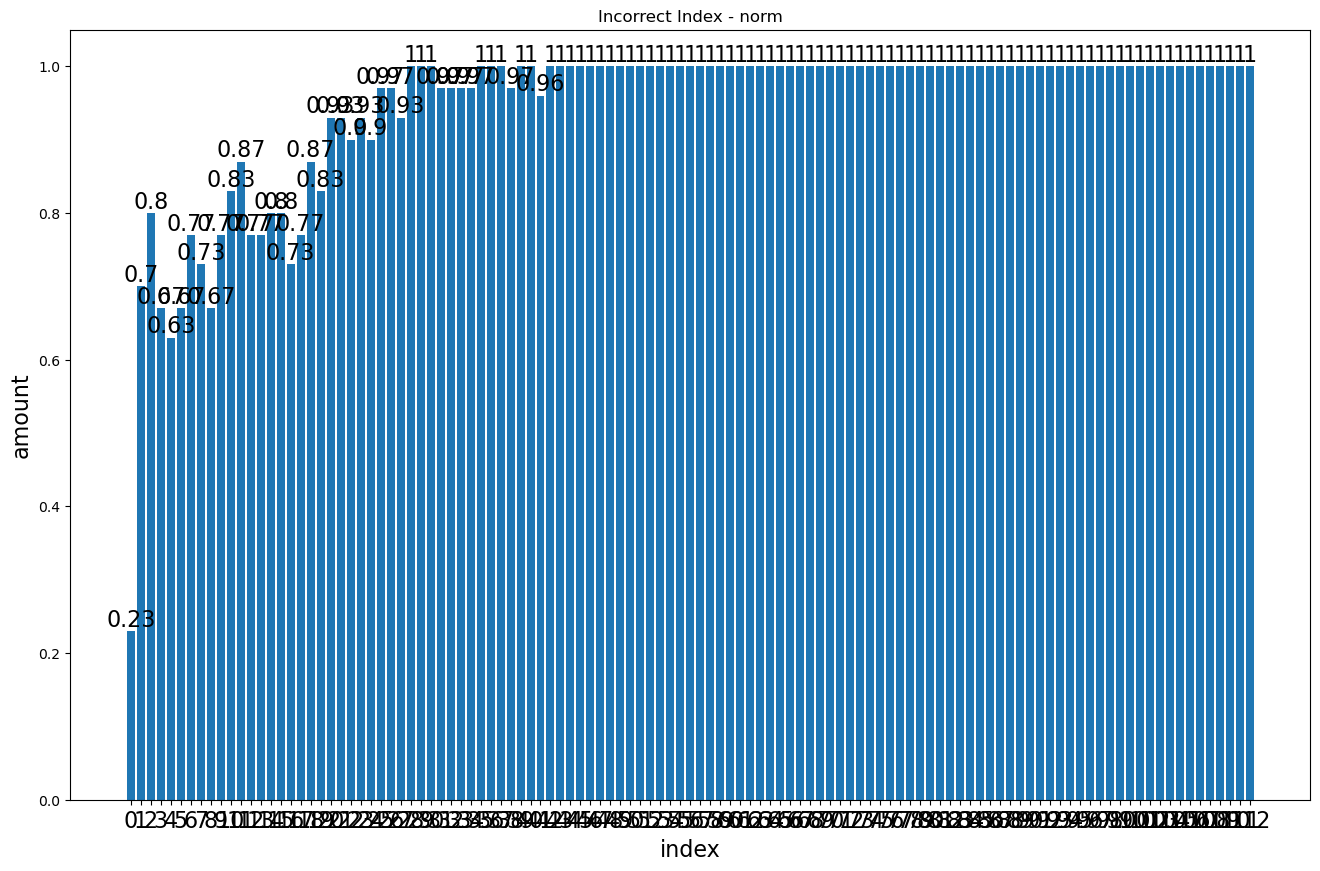

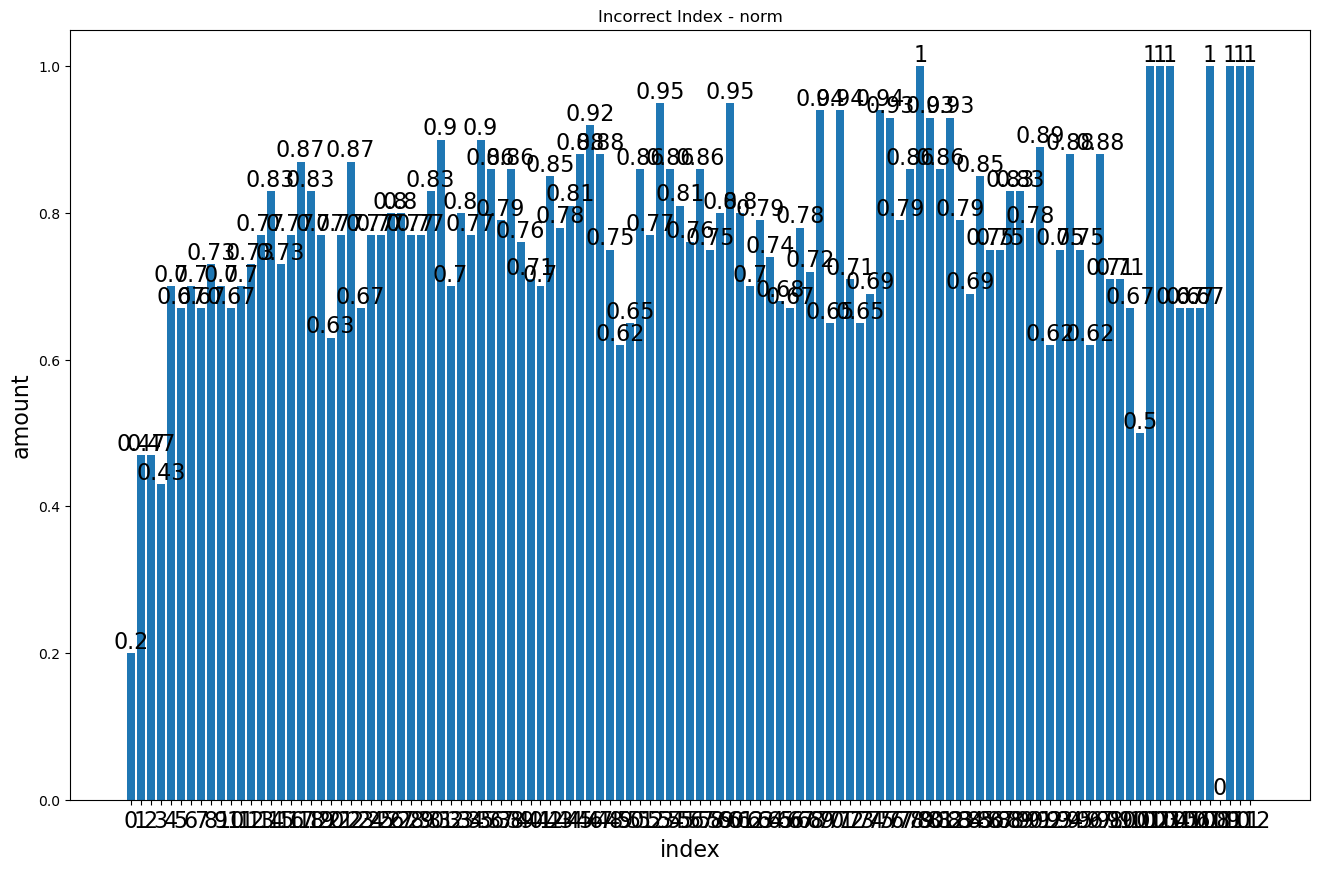

In [31]:
list_of_file = [test_unchunk_0, test_chunk_0]
list_of_test_file = [test_long_data, test_long_data]

for file, test_file in zip(list_of_file, list_of_test_file):
    print(find_acc(file, test_file))

for file in list_of_file:
    x = find_wrong_idx(file, test_file)
    plt.figure(x)

('9.9944%', '-31.3427%', '15.0232%')
('13.1927%', '-58.6392%', '22.3720%')


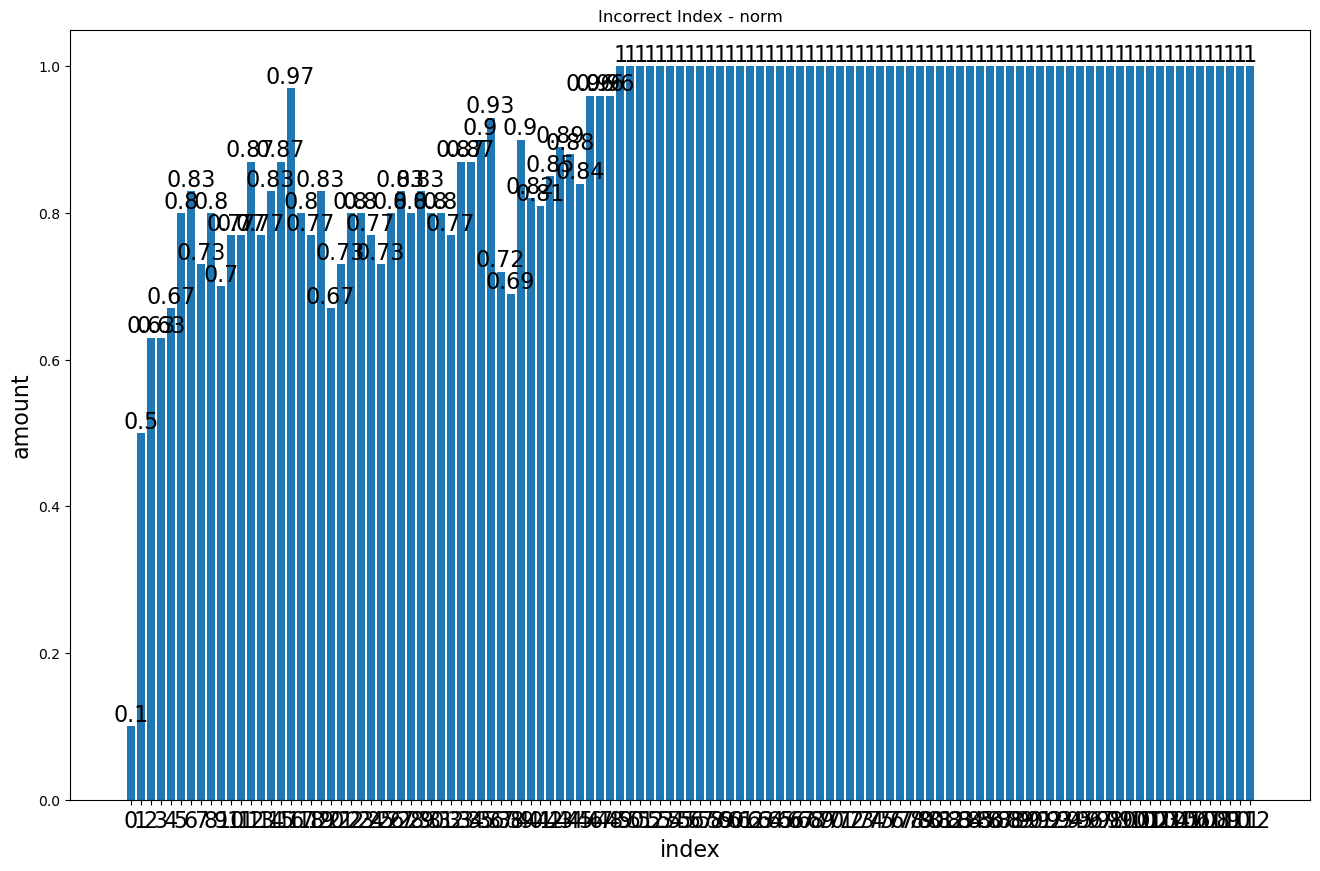

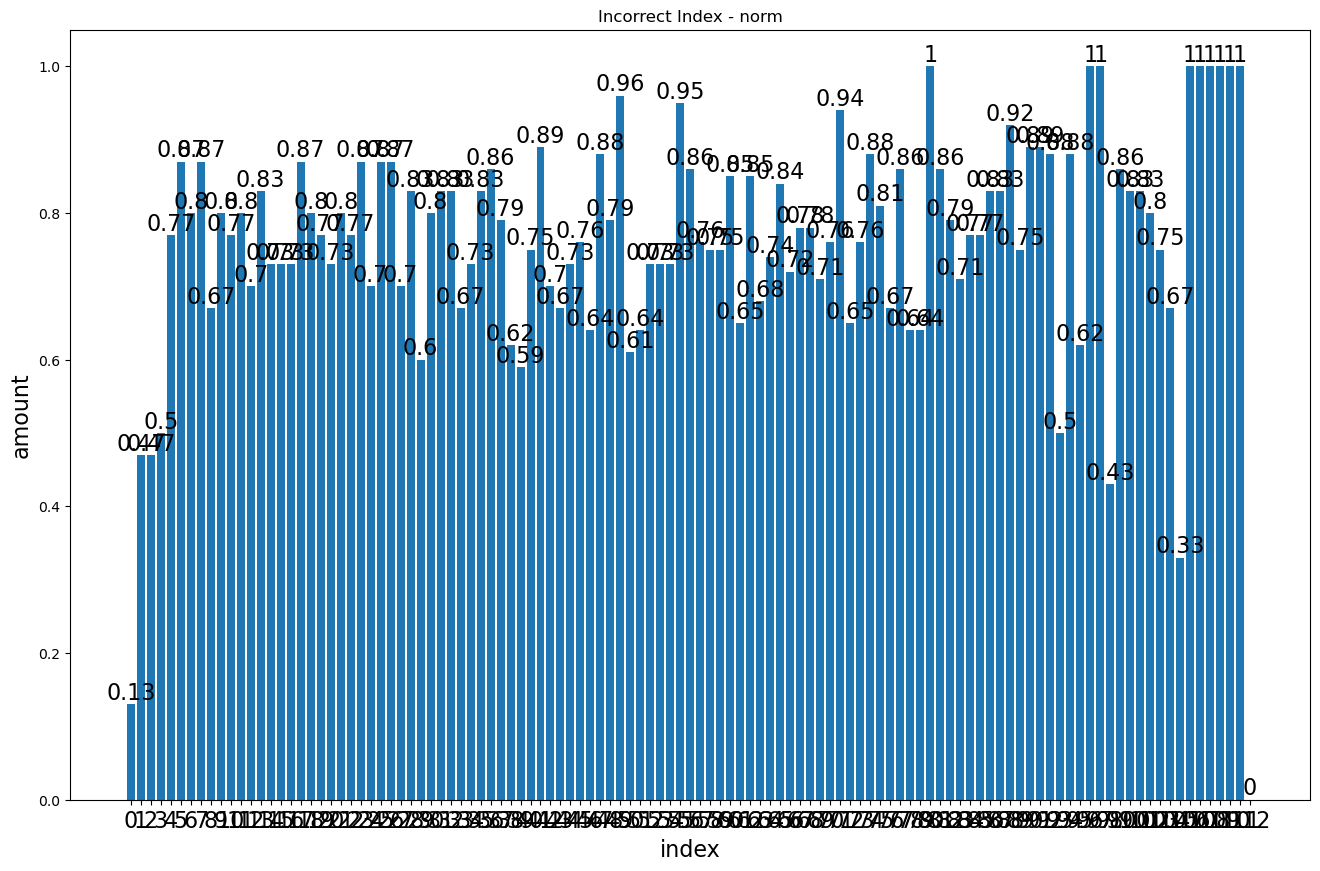

In [33]:
list_of_file = [test_unchunk_1, test_chunk_1]
list_of_test_file = [test_long_data, test_long_data]

for file, test_file in zip(list_of_file, list_of_test_file):
    print(find_acc(file, test_file))

for file in list_of_file:
    x = find_wrong_idx(file, test_file)
    plt.figure(x)

('8.7790%', '-29.2205%', '13.1937%')
('12.0588%', '-68.0907%', '20.8041%')


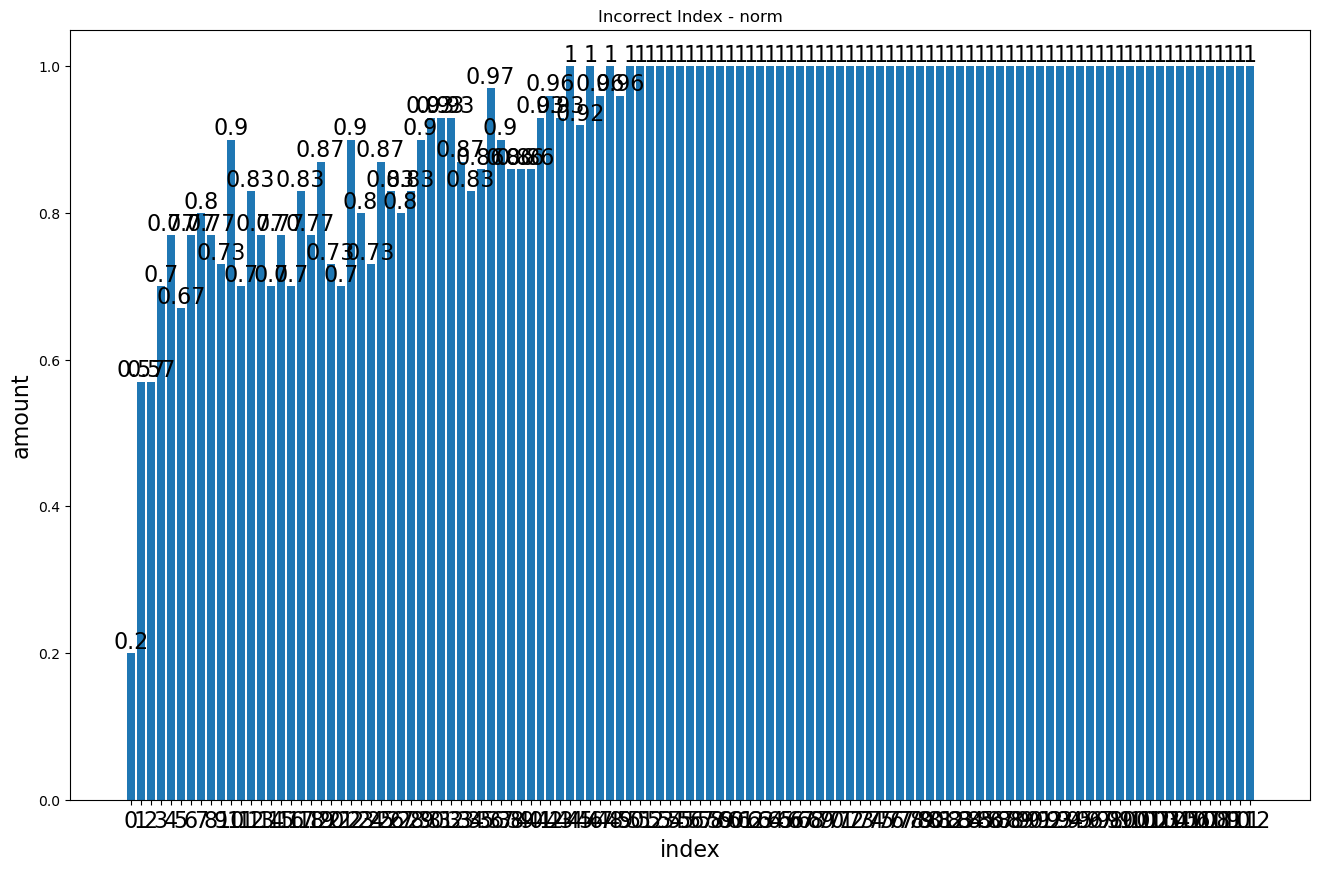

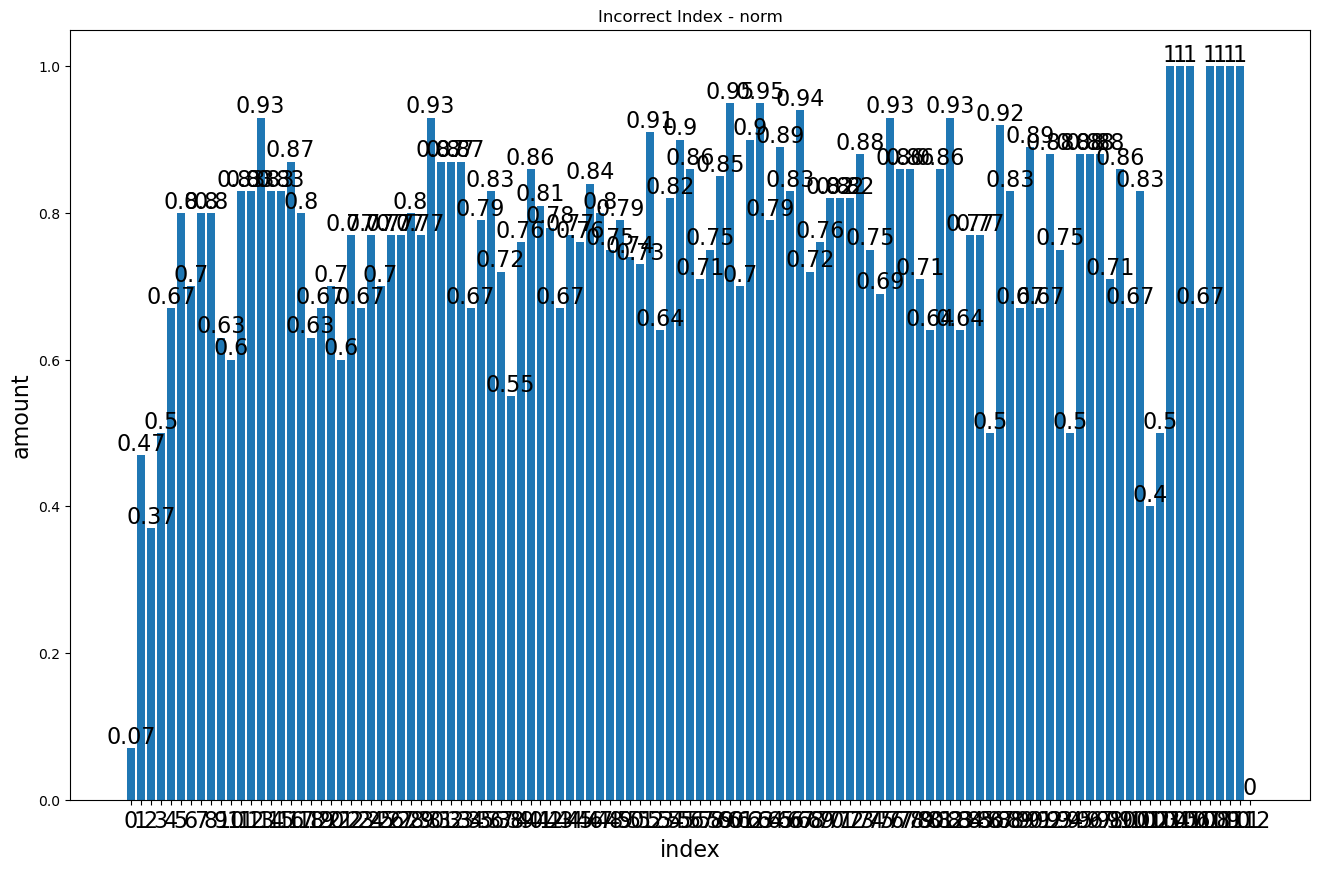

In [34]:
list_of_file = [test_unchunk_2, test_chunk_2]
list_of_test_file = [test_long_data, test_long_data]

for file, test_file in zip(list_of_file, list_of_test_file):
    print(find_acc(file, test_file))

for file in list_of_file:
    x = find_wrong_idx(file, test_file)
    plt.figure(x)

In [36]:
print("Unique Length of Rhythm label") # generate with logic --> random length 8, 12, 16 and random +1, +2
len_of_label = pd.concat([test_long_data["decode_rhythm"].apply(lambda x: len(ast.literal_eval(x))).value_counts().sort_index()]).set_axis(["test_data"])
len_of_label

Unique Length of Rhythm label


ValueError: Length mismatch: Expected axis has 28 elements, new values have 1 elements

In [3]:
len_of_label = test_long_data["decode_rhythm"].apply(lambda x: len(ast.literal_eval(x))).value_counts().sort_index()
len_of_label

decode_rhythm
35     1
40     1
41     1
44     1
45     1
48     1
50     1
51     1
55     1
58     1
63     1
66     1
69     1
74     1
76     1
77     1
84     1
86     1
90     3
92     1
98     1
100    1
102    1
103    1
104    1
108    1
109    1
113    1
Name: count, dtype: int64

In [40]:
type(len_of_label)

pandas.core.series.Series

In [7]:
list(len_of_label.index)

[35,
 40,
 41,
 44,
 45,
 48,
 50,
 51,
 55,
 58,
 63,
 66,
 69,
 74,
 76,
 77,
 84,
 86,
 90,
 92,
 98,
 100,
 102,
 103,
 104,
 108,
 109,
 113]

In [25]:
data_point = []
for i in range(0, 120):
    data_point.insert(i, 0)
    for j in list(len_of_label.index):
        if i < j:
            data_point[i] += 1
data_point

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 7,
 6,
 6,
 5,
 4,
 3,
 3,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

NameError: name 'data_point' is not defined

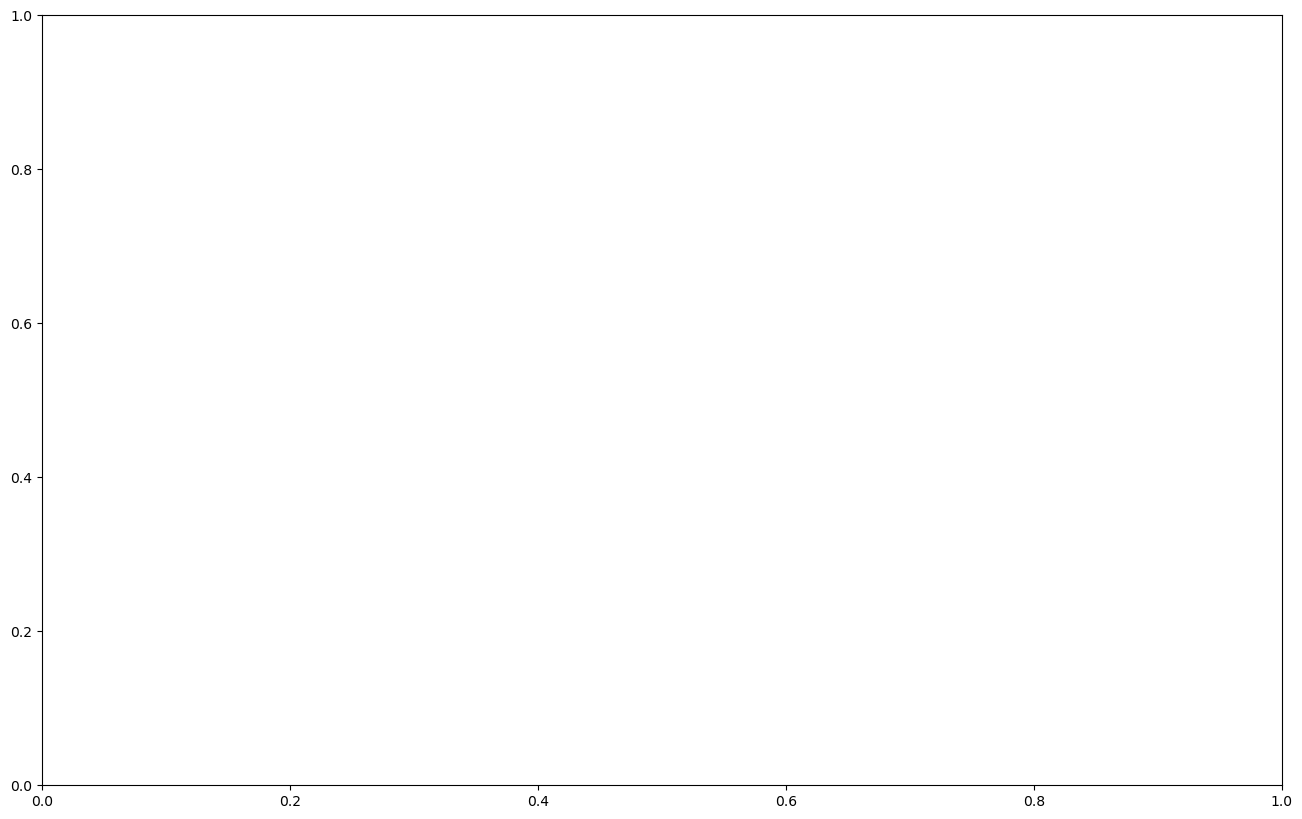

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16,10))
plt.plot(data_point, marker='o')
plt.xticks(range(0, 130, 10))
plt.close()
fig

In [26]:
# test

import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

def plot_music_notation(pitches, rhythms):
    # Create a new figure for the plot
    fig, ax = plt.subplots(figsize=(10, 4))

    # Draw the staff lines
    for i in range(5):
        ax.hlines(i, 0, 10, color='black', lw=1)

    # Define note positions on the staff (assuming C4 is on the third line)
    note_positions = {60: -1, 62: -0.5, 64: 5, 65: 6, 67: 7, 69: 8, 71: 9}  # C4 to B4
    
    # Plot each pitch note
    for idx, (pitch, rhythm) in enumerate(zip(pitches, rhythms)):
        if pitch in note_positions:
            # X position for the note based on rhythm duration
            x_pos = idx * 1.5 + 0.5 # Adjust spacing between notes as needed
            y_pos = note_positions[pitch]
            
            # Add note to the staff
            ax.plot(x_pos, y_pos, 'o', markersize=15, label=f'Pitch {pitch}, Rhythm {rhythm}')
            ax.text(x_pos, y_pos + 0.1, rhythm, horizontalalignment='center', fontsize=10)

    # Set limits and labels
    ax.set_xlim(0, len(pitches) * 1.5)
    ax.set_ylim(-2, 10)
    ax.axis('off')  # Hide axes
    plt.title("Music Notation")
    
    # Display the plot in Streamlit
    # st.pyplot(fig)




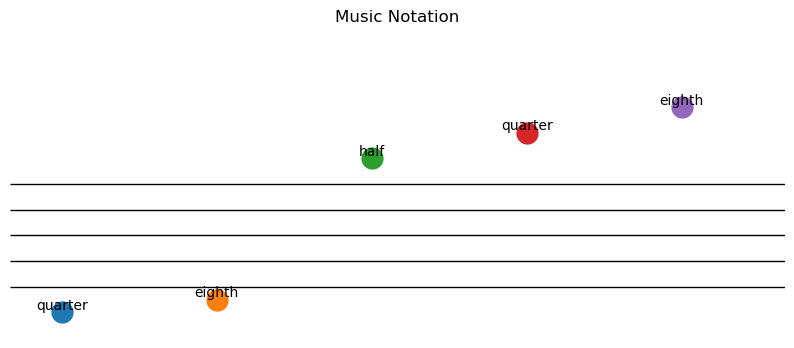

In [27]:
# Example pitch and rhythm notes
pitches = [60, 62, 64, 65, 67]  # MIDI pitch numbers (C4, D4, E4, F4, G4)
rhythms = ['quarter', 'eighth', 'half', 'quarter', 'eighth']

# Call the function to plot music notation
x = plot_music_notation(pitches, rhythms)
x

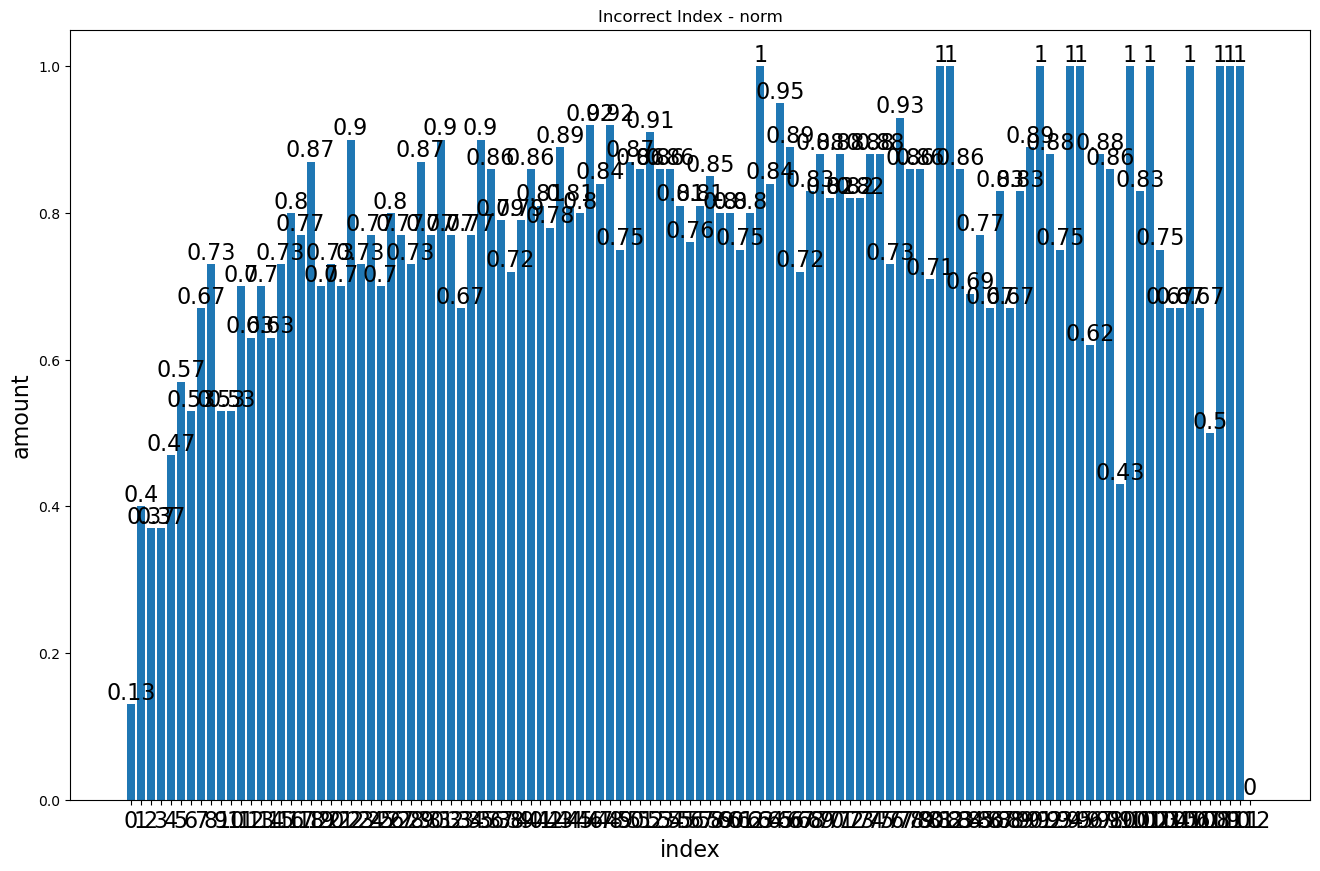

In [14]:
list_of_file = [pd.read_csv("12_changerange/log/transformer_linear_long_length_data_0_20241031-1924/test_long_data2_FULL.csv")]
list_of_test_file = [test_long_data]


for file in list_of_file:
    x = find_wrong_idx(file, test_long_data)
    plt.figure(x)

In [17]:

import pretty_midi
midi_file = "@wabapp/demo_realsomg_melody/Fur_Elise.mid"
# mid = MidiFile(midi_file)
pret = pretty_midi.PrettyMIDI(midi_file)


stop = 20
start = 0

# print(mid)
# for track in mid.tracks:
#     print(track)
        # for event in track:
        #     if event.type != "control_change" and event.type != "MetaMessage":
        #         print(event)
        #         start += 1 
        #     if start == stop:
        #         break
print("-----------")
start = 0
print(pret)
tempo_changes = pret.get_tempo_changes()
tempo_bpm = tempo_changes[1][0]
print(tempo_bpm)
pret.get_piano_roll()

-----------
120.0


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
pret.get_piano_roll()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

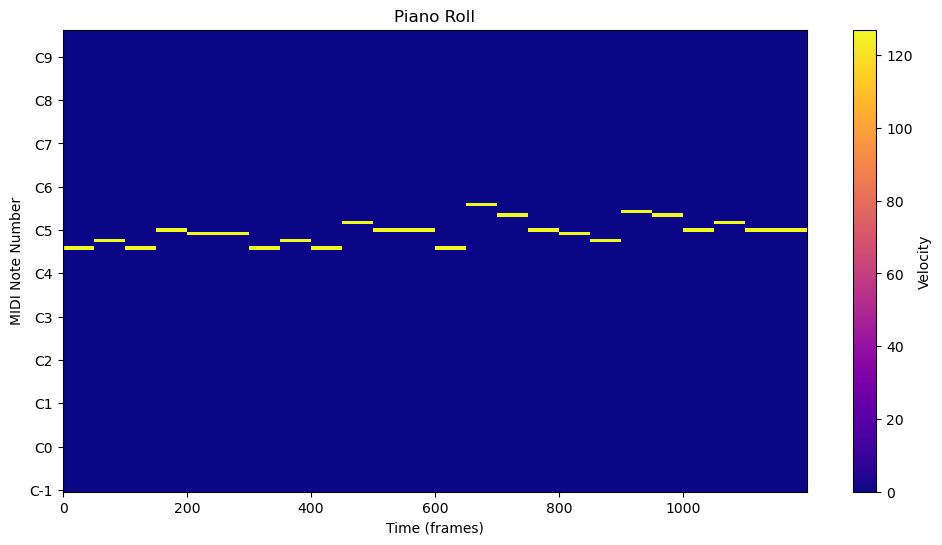

In [3]:
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np

# Load a MIDI file
midi_file = "@wabapp/demo_realsomg_melody_fixed_velo/Happy_Birthday.mid"  # Replace with the path to your MIDI file
midi_data = pretty_midi.PrettyMIDI(midi_file)

# Extract the piano roll
piano_roll = midi_data.get_piano_roll(fs=100)  # fs sets the frame rate

# Plotting the piano roll
def plot_piano_roll(piano_roll):

    fig = plt.figure(figsize=(12, 6))
    plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='plasma', interpolation='nearest')

    # Setting the labels and title
    plt.xlabel("Time (frames)")
    plt.ylabel("MIDI Note Number")
    plt.title("Piano Roll")

    # Customizing the y-axis for MIDI notes (e.g., C major scale marks)
    yticks = np.arange(0, 128, 12)  # MIDI note numbers for C notes
    ytick_labels = [pretty_midi.note_number_to_name(ytick) for ytick in yticks]
    plt.yticks(yticks, ytick_labels)

    # Display the plot
    plt.colorbar(label="Velocity")
    plt.close()
    return fig
plot_piano_roll(piano_roll)
